# CheXScan CheXNet Model

## Libraries

In [1]:
import numpy as np
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from PIL import Image

import time

print("Imports completed successfully.")

Imports completed successfully.


## Run this code if you're using Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

## Transform functions for data augmentation and normalization

You can further adjust these parameters if needed to achieve the desired balance between augmentation and maintaining image quality.

#### train_transform and test_transform

    Apply transformations to the input image for training data.

    Parameters:
        image (PIL.Image): Input image to be transformed.

    Returns:
        transformed_image (Tensor): Transformed image in tensor format.

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Dataset Summary

In [5]:
data_dir = r"E:/JEAN/chexscan/data"
train_data_dir = os.path.join(data_dir, 'train_data')
test_data_dir = os.path.join(data_dir, 'test_data')

In [6]:
def count_images_in_subdirectories(directory):
    subdirectories = os.listdir(directory)
    counts = {}
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        count = sum(len(files) for _, _, files in os.walk(subdir_path))
        counts[subdir] = count
    return counts

In [7]:
train_counts = count_images_in_subdirectories(train_data_dir)
test_counts = count_images_in_subdirectories(test_data_dir)

print("Number of images in each subdirectory of training data:")
for subdir, count in train_counts.items():
    print(f"{subdir}: {count}")

print("\nNumber of images in each subdirectory of testing data:")
for subdir, count in test_counts.items():
    print(f"{subdir}: {count}")

Number of images in each subdirectory of training data:
Normal: 800
Pneumonia: 800
Tuberculosis: 800

Number of images in each subdirectory of testing data:
Normal: 200
Pneumonia: 200
Tuberculosis: 200


## Define datasets (Online)

In [8]:
# data_dir = '/content/drive/My Drive/THESIS/Datasets/Mary/'
# train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
# test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

## Define datasets (Local)

In [9]:
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

## Define data loaders

In [10]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## Visualizes training data

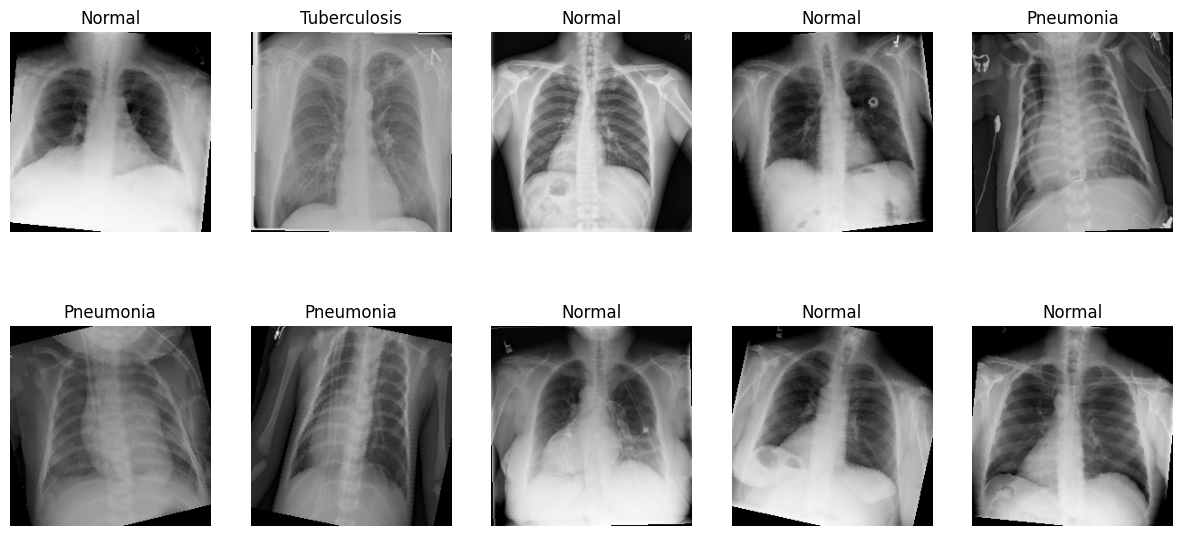

In [11]:
def visualize_training_data(loader):
    
    """
    Visualizes a batch of training images along with their corresponding labels.

    Parameters:
        loader (DataLoader): DataLoader containing the training dataset.

    Returns:
        None
    """
    
    classes = loader.dataset.classes
    class_names = {i: classes[i] for i in range(len(classes))}
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(figsize=(15, 7), ncols=5, nrows=2)
    for i, ax in enumerate(axes.flat):
        image = images[i].permute(1, 2, 0)
        ax.imshow(image)
        ax.set_title(class_names[labels[i].item()])
        ax.axis('off')
    plt.show()

visualize_training_data(train_loader)

## Define CheXNet model

In [22]:
model = models.densenet121(pretrained=False)

# Load weights from the saved checkpoint
checkpoint = torch.load("chexnet.pth.tar")
model.load_state_dict(checkpoint['state_dict'])

RuntimeError: Error(s) in loading state_dict for DenseNet:
	Missing key(s) in state_dict: "features.conv0.weight", "features.norm0.weight", "features.norm0.bias", "features.norm0.running_mean", "features.norm0.running_var", "features.denseblock1.denselayer1.norm1.weight", "features.denseblock1.denselayer1.norm1.bias", "features.denseblock1.denselayer1.norm1.running_mean", "features.denseblock1.denselayer1.norm1.running_var", "features.denseblock1.denselayer1.conv1.weight", "features.denseblock1.denselayer1.norm2.weight", "features.denseblock1.denselayer1.norm2.bias", "features.denseblock1.denselayer1.norm2.running_mean", "features.denseblock1.denselayer1.norm2.running_var", "features.denseblock1.denselayer1.conv2.weight", "features.denseblock1.denselayer2.norm1.weight", "features.denseblock1.denselayer2.norm1.bias", "features.denseblock1.denselayer2.norm1.running_mean", "features.denseblock1.denselayer2.norm1.running_var", "features.denseblock1.denselayer2.conv1.weight", "features.denseblock1.denselayer2.norm2.weight", "features.denseblock1.denselayer2.norm2.bias", "features.denseblock1.denselayer2.norm2.running_mean", "features.denseblock1.denselayer2.norm2.running_var", "features.denseblock1.denselayer2.conv2.weight", "features.denseblock1.denselayer3.norm1.weight", "features.denseblock1.denselayer3.norm1.bias", "features.denseblock1.denselayer3.norm1.running_mean", "features.denseblock1.denselayer3.norm1.running_var", "features.denseblock1.denselayer3.conv1.weight", "features.denseblock1.denselayer3.norm2.weight", "features.denseblock1.denselayer3.norm2.bias", "features.denseblock1.denselayer3.norm2.running_mean", "features.denseblock1.denselayer3.norm2.running_var", "features.denseblock1.denselayer3.conv2.weight", "features.denseblock1.denselayer4.norm1.weight", "features.denseblock1.denselayer4.norm1.bias", "features.denseblock1.denselayer4.norm1.running_mean", "features.denseblock1.denselayer4.norm1.running_var", "features.denseblock1.denselayer4.conv1.weight", "features.denseblock1.denselayer4.norm2.weight", "features.denseblock1.denselayer4.norm2.bias", "features.denseblock1.denselayer4.norm2.running_mean", "features.denseblock1.denselayer4.norm2.running_var", "features.denseblock1.denselayer4.conv2.weight", "features.denseblock1.denselayer5.norm1.weight", "features.denseblock1.denselayer5.norm1.bias", "features.denseblock1.denselayer5.norm1.running_mean", "features.denseblock1.denselayer5.norm1.running_var", "features.denseblock1.denselayer5.conv1.weight", "features.denseblock1.denselayer5.norm2.weight", "features.denseblock1.denselayer5.norm2.bias", "features.denseblock1.denselayer5.norm2.running_mean", "features.denseblock1.denselayer5.norm2.running_var", "features.denseblock1.denselayer5.conv2.weight", "features.denseblock1.denselayer6.norm1.weight", "features.denseblock1.denselayer6.norm1.bias", "features.denseblock1.denselayer6.norm1.running_mean", "features.denseblock1.denselayer6.norm1.running_var", "features.denseblock1.denselayer6.conv1.weight", "features.denseblock1.denselayer6.norm2.weight", "features.denseblock1.denselayer6.norm2.bias", "features.denseblock1.denselayer6.norm2.running_mean", "features.denseblock1.denselayer6.norm2.running_var", "features.denseblock1.denselayer6.conv2.weight", "features.transition1.norm.weight", "features.transition1.norm.bias", "features.transition1.norm.running_mean", "features.transition1.norm.running_var", "features.transition1.conv.weight", "features.denseblock2.denselayer1.norm1.weight", "features.denseblock2.denselayer1.norm1.bias", "features.denseblock2.denselayer1.norm1.running_mean", "features.denseblock2.denselayer1.norm1.running_var", "features.denseblock2.denselayer1.conv1.weight", "features.denseblock2.denselayer1.norm2.weight", "features.denseblock2.denselayer1.norm2.bias", "features.denseblock2.denselayer1.norm2.running_mean", "features.denseblock2.denselayer1.norm2.running_var", "features.denseblock2.denselayer1.conv2.weight", "features.denseblock2.denselayer2.norm1.weight", "features.denseblock2.denselayer2.norm1.bias", "features.denseblock2.denselayer2.norm1.running_mean", "features.denseblock2.denselayer2.norm1.running_var", "features.denseblock2.denselayer2.conv1.weight", "features.denseblock2.denselayer2.norm2.weight", "features.denseblock2.denselayer2.norm2.bias", "features.denseblock2.denselayer2.norm2.running_mean", "features.denseblock2.denselayer2.norm2.running_var", "features.denseblock2.denselayer2.conv2.weight", "features.denseblock2.denselayer3.norm1.weight", "features.denseblock2.denselayer3.norm1.bias", "features.denseblock2.denselayer3.norm1.running_mean", "features.denseblock2.denselayer3.norm1.running_var", "features.denseblock2.denselayer3.conv1.weight", "features.denseblock2.denselayer3.norm2.weight", "features.denseblock2.denselayer3.norm2.bias", "features.denseblock2.denselayer3.norm2.running_mean", "features.denseblock2.denselayer3.norm2.running_var", "features.denseblock2.denselayer3.conv2.weight", "features.denseblock2.denselayer4.norm1.weight", "features.denseblock2.denselayer4.norm1.bias", "features.denseblock2.denselayer4.norm1.running_mean", "features.denseblock2.denselayer4.norm1.running_var", "features.denseblock2.denselayer4.conv1.weight", "features.denseblock2.denselayer4.norm2.weight", "features.denseblock2.denselayer4.norm2.bias", "features.denseblock2.denselayer4.norm2.running_mean", "features.denseblock2.denselayer4.norm2.running_var", "features.denseblock2.denselayer4.conv2.weight", "features.denseblock2.denselayer5.norm1.weight", "features.denseblock2.denselayer5.norm1.bias", "features.denseblock2.denselayer5.norm1.running_mean", "features.denseblock2.denselayer5.norm1.running_var", "features.denseblock2.denselayer5.conv1.weight", "features.denseblock2.denselayer5.norm2.weight", "features.denseblock2.denselayer5.norm2.bias", "features.denseblock2.denselayer5.norm2.running_mean", "features.denseblock2.denselayer5.norm2.running_var", "features.denseblock2.denselayer5.conv2.weight", "features.denseblock2.denselayer6.norm1.weight", "features.denseblock2.denselayer6.norm1.bias", "features.denseblock2.denselayer6.norm1.running_mean", "features.denseblock2.denselayer6.norm1.running_var", "features.denseblock2.denselayer6.conv1.weight", "features.denseblock2.denselayer6.norm2.weight", "features.denseblock2.denselayer6.norm2.bias", "features.denseblock2.denselayer6.norm2.running_mean", "features.denseblock2.denselayer6.norm2.running_var", "features.denseblock2.denselayer6.conv2.weight", "features.denseblock2.denselayer7.norm1.weight", "features.denseblock2.denselayer7.norm1.bias", "features.denseblock2.denselayer7.norm1.running_mean", "features.denseblock2.denselayer7.norm1.running_var", "features.denseblock2.denselayer7.conv1.weight", "features.denseblock2.denselayer7.norm2.weight", "features.denseblock2.denselayer7.norm2.bias", "features.denseblock2.denselayer7.norm2.running_mean", "features.denseblock2.denselayer7.norm2.running_var", "features.denseblock2.denselayer7.conv2.weight", "features.denseblock2.denselayer8.norm1.weight", "features.denseblock2.denselayer8.norm1.bias", "features.denseblock2.denselayer8.norm1.running_mean", "features.denseblock2.denselayer8.norm1.running_var", "features.denseblock2.denselayer8.conv1.weight", "features.denseblock2.denselayer8.norm2.weight", "features.denseblock2.denselayer8.norm2.bias", "features.denseblock2.denselayer8.norm2.running_mean", "features.denseblock2.denselayer8.norm2.running_var", "features.denseblock2.denselayer8.conv2.weight", "features.denseblock2.denselayer9.norm1.weight", "features.denseblock2.denselayer9.norm1.bias", "features.denseblock2.denselayer9.norm1.running_mean", "features.denseblock2.denselayer9.norm1.running_var", "features.denseblock2.denselayer9.conv1.weight", "features.denseblock2.denselayer9.norm2.weight", "features.denseblock2.denselayer9.norm2.bias", "features.denseblock2.denselayer9.norm2.running_mean", "features.denseblock2.denselayer9.norm2.running_var", "features.denseblock2.denselayer9.conv2.weight", "features.denseblock2.denselayer10.norm1.weight", "features.denseblock2.denselayer10.norm1.bias", "features.denseblock2.denselayer10.norm1.running_mean", "features.denseblock2.denselayer10.norm1.running_var", "features.denseblock2.denselayer10.conv1.weight", "features.denseblock2.denselayer10.norm2.weight", "features.denseblock2.denselayer10.norm2.bias", "features.denseblock2.denselayer10.norm2.running_mean", "features.denseblock2.denselayer10.norm2.running_var", "features.denseblock2.denselayer10.conv2.weight", "features.denseblock2.denselayer11.norm1.weight", "features.denseblock2.denselayer11.norm1.bias", "features.denseblock2.denselayer11.norm1.running_mean", "features.denseblock2.denselayer11.norm1.running_var", "features.denseblock2.denselayer11.conv1.weight", "features.denseblock2.denselayer11.norm2.weight", "features.denseblock2.denselayer11.norm2.bias", "features.denseblock2.denselayer11.norm2.running_mean", "features.denseblock2.denselayer11.norm2.running_var", "features.denseblock2.denselayer11.conv2.weight", "features.denseblock2.denselayer12.norm1.weight", "features.denseblock2.denselayer12.norm1.bias", "features.denseblock2.denselayer12.norm1.running_mean", "features.denseblock2.denselayer12.norm1.running_var", "features.denseblock2.denselayer12.conv1.weight", "features.denseblock2.denselayer12.norm2.weight", "features.denseblock2.denselayer12.norm2.bias", "features.denseblock2.denselayer12.norm2.running_mean", "features.denseblock2.denselayer12.norm2.running_var", "features.denseblock2.denselayer12.conv2.weight", "features.transition2.norm.weight", "features.transition2.norm.bias", "features.transition2.norm.running_mean", "features.transition2.norm.running_var", "features.transition2.conv.weight", "features.denseblock3.denselayer1.norm1.weight", "features.denseblock3.denselayer1.norm1.bias", "features.denseblock3.denselayer1.norm1.running_mean", "features.denseblock3.denselayer1.norm1.running_var", "features.denseblock3.denselayer1.conv1.weight", "features.denseblock3.denselayer1.norm2.weight", "features.denseblock3.denselayer1.norm2.bias", "features.denseblock3.denselayer1.norm2.running_mean", "features.denseblock3.denselayer1.norm2.running_var", "features.denseblock3.denselayer1.conv2.weight", "features.denseblock3.denselayer2.norm1.weight", "features.denseblock3.denselayer2.norm1.bias", "features.denseblock3.denselayer2.norm1.running_mean", "features.denseblock3.denselayer2.norm1.running_var", "features.denseblock3.denselayer2.conv1.weight", "features.denseblock3.denselayer2.norm2.weight", "features.denseblock3.denselayer2.norm2.bias", "features.denseblock3.denselayer2.norm2.running_mean", "features.denseblock3.denselayer2.norm2.running_var", "features.denseblock3.denselayer2.conv2.weight", "features.denseblock3.denselayer3.norm1.weight", "features.denseblock3.denselayer3.norm1.bias", "features.denseblock3.denselayer3.norm1.running_mean", "features.denseblock3.denselayer3.norm1.running_var", "features.denseblock3.denselayer3.conv1.weight", "features.denseblock3.denselayer3.norm2.weight", "features.denseblock3.denselayer3.norm2.bias", "features.denseblock3.denselayer3.norm2.running_mean", "features.denseblock3.denselayer3.norm2.running_var", "features.denseblock3.denselayer3.conv2.weight", "features.denseblock3.denselayer4.norm1.weight", "features.denseblock3.denselayer4.norm1.bias", "features.denseblock3.denselayer4.norm1.running_mean", "features.denseblock3.denselayer4.norm1.running_var", "features.denseblock3.denselayer4.conv1.weight", "features.denseblock3.denselayer4.norm2.weight", "features.denseblock3.denselayer4.norm2.bias", "features.denseblock3.denselayer4.norm2.running_mean", "features.denseblock3.denselayer4.norm2.running_var", "features.denseblock3.denselayer4.conv2.weight", "features.denseblock3.denselayer5.norm1.weight", "features.denseblock3.denselayer5.norm1.bias", "features.denseblock3.denselayer5.norm1.running_mean", "features.denseblock3.denselayer5.norm1.running_var", "features.denseblock3.denselayer5.conv1.weight", "features.denseblock3.denselayer5.norm2.weight", "features.denseblock3.denselayer5.norm2.bias", "features.denseblock3.denselayer5.norm2.running_mean", "features.denseblock3.denselayer5.norm2.running_var", "features.denseblock3.denselayer5.conv2.weight", "features.denseblock3.denselayer6.norm1.weight", "features.denseblock3.denselayer6.norm1.bias", "features.denseblock3.denselayer6.norm1.running_mean", "features.denseblock3.denselayer6.norm1.running_var", "features.denseblock3.denselayer6.conv1.weight", "features.denseblock3.denselayer6.norm2.weight", "features.denseblock3.denselayer6.norm2.bias", "features.denseblock3.denselayer6.norm2.running_mean", "features.denseblock3.denselayer6.norm2.running_var", "features.denseblock3.denselayer6.conv2.weight", "features.denseblock3.denselayer7.norm1.weight", "features.denseblock3.denselayer7.norm1.bias", "features.denseblock3.denselayer7.norm1.running_mean", "features.denseblock3.denselayer7.norm1.running_var", "features.denseblock3.denselayer7.conv1.weight", "features.denseblock3.denselayer7.norm2.weight", "features.denseblock3.denselayer7.norm2.bias", "features.denseblock3.denselayer7.norm2.running_mean", "features.denseblock3.denselayer7.norm2.running_var", "features.denseblock3.denselayer7.conv2.weight", "features.denseblock3.denselayer8.norm1.weight", "features.denseblock3.denselayer8.norm1.bias", "features.denseblock3.denselayer8.norm1.running_mean", "features.denseblock3.denselayer8.norm1.running_var", "features.denseblock3.denselayer8.conv1.weight", "features.denseblock3.denselayer8.norm2.weight", "features.denseblock3.denselayer8.norm2.bias", "features.denseblock3.denselayer8.norm2.running_mean", "features.denseblock3.denselayer8.norm2.running_var", "features.denseblock3.denselayer8.conv2.weight", "features.denseblock3.denselayer9.norm1.weight", "features.denseblock3.denselayer9.norm1.bias", "features.denseblock3.denselayer9.norm1.running_mean", "features.denseblock3.denselayer9.norm1.running_var", "features.denseblock3.denselayer9.conv1.weight", "features.denseblock3.denselayer9.norm2.weight", "features.denseblock3.denselayer9.norm2.bias", "features.denseblock3.denselayer9.norm2.running_mean", "features.denseblock3.denselayer9.norm2.running_var", "features.denseblock3.denselayer9.conv2.weight", "features.denseblock3.denselayer10.norm1.weight", "features.denseblock3.denselayer10.norm1.bias", "features.denseblock3.denselayer10.norm1.running_mean", "features.denseblock3.denselayer10.norm1.running_var", "features.denseblock3.denselayer10.conv1.weight", "features.denseblock3.denselayer10.norm2.weight", "features.denseblock3.denselayer10.norm2.bias", "features.denseblock3.denselayer10.norm2.running_mean", "features.denseblock3.denselayer10.norm2.running_var", "features.denseblock3.denselayer10.conv2.weight", "features.denseblock3.denselayer11.norm1.weight", "features.denseblock3.denselayer11.norm1.bias", "features.denseblock3.denselayer11.norm1.running_mean", "features.denseblock3.denselayer11.norm1.running_var", "features.denseblock3.denselayer11.conv1.weight", "features.denseblock3.denselayer11.norm2.weight", "features.denseblock3.denselayer11.norm2.bias", "features.denseblock3.denselayer11.norm2.running_mean", "features.denseblock3.denselayer11.norm2.running_var", "features.denseblock3.denselayer11.conv2.weight", "features.denseblock3.denselayer12.norm1.weight", "features.denseblock3.denselayer12.norm1.bias", "features.denseblock3.denselayer12.norm1.running_mean", "features.denseblock3.denselayer12.norm1.running_var", "features.denseblock3.denselayer12.conv1.weight", "features.denseblock3.denselayer12.norm2.weight", "features.denseblock3.denselayer12.norm2.bias", "features.denseblock3.denselayer12.norm2.running_mean", "features.denseblock3.denselayer12.norm2.running_var", "features.denseblock3.denselayer12.conv2.weight", "features.denseblock3.denselayer13.norm1.weight", "features.denseblock3.denselayer13.norm1.bias", "features.denseblock3.denselayer13.norm1.running_mean", "features.denseblock3.denselayer13.norm1.running_var", "features.denseblock3.denselayer13.conv1.weight", "features.denseblock3.denselayer13.norm2.weight", "features.denseblock3.denselayer13.norm2.bias", "features.denseblock3.denselayer13.norm2.running_mean", "features.denseblock3.denselayer13.norm2.running_var", "features.denseblock3.denselayer13.conv2.weight", "features.denseblock3.denselayer14.norm1.weight", "features.denseblock3.denselayer14.norm1.bias", "features.denseblock3.denselayer14.norm1.running_mean", "features.denseblock3.denselayer14.norm1.running_var", "features.denseblock3.denselayer14.conv1.weight", "features.denseblock3.denselayer14.norm2.weight", "features.denseblock3.denselayer14.norm2.bias", "features.denseblock3.denselayer14.norm2.running_mean", "features.denseblock3.denselayer14.norm2.running_var", "features.denseblock3.denselayer14.conv2.weight", "features.denseblock3.denselayer15.norm1.weight", "features.denseblock3.denselayer15.norm1.bias", "features.denseblock3.denselayer15.norm1.running_mean", "features.denseblock3.denselayer15.norm1.running_var", "features.denseblock3.denselayer15.conv1.weight", "features.denseblock3.denselayer15.norm2.weight", "features.denseblock3.denselayer15.norm2.bias", "features.denseblock3.denselayer15.norm2.running_mean", "features.denseblock3.denselayer15.norm2.running_var", "features.denseblock3.denselayer15.conv2.weight", "features.denseblock3.denselayer16.norm1.weight", "features.denseblock3.denselayer16.norm1.bias", "features.denseblock3.denselayer16.norm1.running_mean", "features.denseblock3.denselayer16.norm1.running_var", "features.denseblock3.denselayer16.conv1.weight", "features.denseblock3.denselayer16.norm2.weight", "features.denseblock3.denselayer16.norm2.bias", "features.denseblock3.denselayer16.norm2.running_mean", "features.denseblock3.denselayer16.norm2.running_var", "features.denseblock3.denselayer16.conv2.weight", "features.denseblock3.denselayer17.norm1.weight", "features.denseblock3.denselayer17.norm1.bias", "features.denseblock3.denselayer17.norm1.running_mean", "features.denseblock3.denselayer17.norm1.running_var", "features.denseblock3.denselayer17.conv1.weight", "features.denseblock3.denselayer17.norm2.weight", "features.denseblock3.denselayer17.norm2.bias", "features.denseblock3.denselayer17.norm2.running_mean", "features.denseblock3.denselayer17.norm2.running_var", "features.denseblock3.denselayer17.conv2.weight", "features.denseblock3.denselayer18.norm1.weight", "features.denseblock3.denselayer18.norm1.bias", "features.denseblock3.denselayer18.norm1.running_mean", "features.denseblock3.denselayer18.norm1.running_var", "features.denseblock3.denselayer18.conv1.weight", "features.denseblock3.denselayer18.norm2.weight", "features.denseblock3.denselayer18.norm2.bias", "features.denseblock3.denselayer18.norm2.running_mean", "features.denseblock3.denselayer18.norm2.running_var", "features.denseblock3.denselayer18.conv2.weight", "features.denseblock3.denselayer19.norm1.weight", "features.denseblock3.denselayer19.norm1.bias", "features.denseblock3.denselayer19.norm1.running_mean", "features.denseblock3.denselayer19.norm1.running_var", "features.denseblock3.denselayer19.conv1.weight", "features.denseblock3.denselayer19.norm2.weight", "features.denseblock3.denselayer19.norm2.bias", "features.denseblock3.denselayer19.norm2.running_mean", "features.denseblock3.denselayer19.norm2.running_var", "features.denseblock3.denselayer19.conv2.weight", "features.denseblock3.denselayer20.norm1.weight", "features.denseblock3.denselayer20.norm1.bias", "features.denseblock3.denselayer20.norm1.running_mean", "features.denseblock3.denselayer20.norm1.running_var", "features.denseblock3.denselayer20.conv1.weight", "features.denseblock3.denselayer20.norm2.weight", "features.denseblock3.denselayer20.norm2.bias", "features.denseblock3.denselayer20.norm2.running_mean", "features.denseblock3.denselayer20.norm2.running_var", "features.denseblock3.denselayer20.conv2.weight", "features.denseblock3.denselayer21.norm1.weight", "features.denseblock3.denselayer21.norm1.bias", "features.denseblock3.denselayer21.norm1.running_mean", "features.denseblock3.denselayer21.norm1.running_var", "features.denseblock3.denselayer21.conv1.weight", "features.denseblock3.denselayer21.norm2.weight", "features.denseblock3.denselayer21.norm2.bias", "features.denseblock3.denselayer21.norm2.running_mean", "features.denseblock3.denselayer21.norm2.running_var", "features.denseblock3.denselayer21.conv2.weight", "features.denseblock3.denselayer22.norm1.weight", "features.denseblock3.denselayer22.norm1.bias", "features.denseblock3.denselayer22.norm1.running_mean", "features.denseblock3.denselayer22.norm1.running_var", "features.denseblock3.denselayer22.conv1.weight", "features.denseblock3.denselayer22.norm2.weight", "features.denseblock3.denselayer22.norm2.bias", "features.denseblock3.denselayer22.norm2.running_mean", "features.denseblock3.denselayer22.norm2.running_var", "features.denseblock3.denselayer22.conv2.weight", "features.denseblock3.denselayer23.norm1.weight", "features.denseblock3.denselayer23.norm1.bias", "features.denseblock3.denselayer23.norm1.running_mean", "features.denseblock3.denselayer23.norm1.running_var", "features.denseblock3.denselayer23.conv1.weight", "features.denseblock3.denselayer23.norm2.weight", "features.denseblock3.denselayer23.norm2.bias", "features.denseblock3.denselayer23.norm2.running_mean", "features.denseblock3.denselayer23.norm2.running_var", "features.denseblock3.denselayer23.conv2.weight", "features.denseblock3.denselayer24.norm1.weight", "features.denseblock3.denselayer24.norm1.bias", "features.denseblock3.denselayer24.norm1.running_mean", "features.denseblock3.denselayer24.norm1.running_var", "features.denseblock3.denselayer24.conv1.weight", "features.denseblock3.denselayer24.norm2.weight", "features.denseblock3.denselayer24.norm2.bias", "features.denseblock3.denselayer24.norm2.running_mean", "features.denseblock3.denselayer24.norm2.running_var", "features.denseblock3.denselayer24.conv2.weight", "features.transition3.norm.weight", "features.transition3.norm.bias", "features.transition3.norm.running_mean", "features.transition3.norm.running_var", "features.transition3.conv.weight", "features.denseblock4.denselayer1.norm1.weight", "features.denseblock4.denselayer1.norm1.bias", "features.denseblock4.denselayer1.norm1.running_mean", "features.denseblock4.denselayer1.norm1.running_var", "features.denseblock4.denselayer1.conv1.weight", "features.denseblock4.denselayer1.norm2.weight", "features.denseblock4.denselayer1.norm2.bias", "features.denseblock4.denselayer1.norm2.running_mean", "features.denseblock4.denselayer1.norm2.running_var", "features.denseblock4.denselayer1.conv2.weight", "features.denseblock4.denselayer2.norm1.weight", "features.denseblock4.denselayer2.norm1.bias", "features.denseblock4.denselayer2.norm1.running_mean", "features.denseblock4.denselayer2.norm1.running_var", "features.denseblock4.denselayer2.conv1.weight", "features.denseblock4.denselayer2.norm2.weight", "features.denseblock4.denselayer2.norm2.bias", "features.denseblock4.denselayer2.norm2.running_mean", "features.denseblock4.denselayer2.norm2.running_var", "features.denseblock4.denselayer2.conv2.weight", "features.denseblock4.denselayer3.norm1.weight", "features.denseblock4.denselayer3.norm1.bias", "features.denseblock4.denselayer3.norm1.running_mean", "features.denseblock4.denselayer3.norm1.running_var", "features.denseblock4.denselayer3.conv1.weight", "features.denseblock4.denselayer3.norm2.weight", "features.denseblock4.denselayer3.norm2.bias", "features.denseblock4.denselayer3.norm2.running_mean", "features.denseblock4.denselayer3.norm2.running_var", "features.denseblock4.denselayer3.conv2.weight", "features.denseblock4.denselayer4.norm1.weight", "features.denseblock4.denselayer4.norm1.bias", "features.denseblock4.denselayer4.norm1.running_mean", "features.denseblock4.denselayer4.norm1.running_var", "features.denseblock4.denselayer4.conv1.weight", "features.denseblock4.denselayer4.norm2.weight", "features.denseblock4.denselayer4.norm2.bias", "features.denseblock4.denselayer4.norm2.running_mean", "features.denseblock4.denselayer4.norm2.running_var", "features.denseblock4.denselayer4.conv2.weight", "features.denseblock4.denselayer5.norm1.weight", "features.denseblock4.denselayer5.norm1.bias", "features.denseblock4.denselayer5.norm1.running_mean", "features.denseblock4.denselayer5.norm1.running_var", "features.denseblock4.denselayer5.conv1.weight", "features.denseblock4.denselayer5.norm2.weight", "features.denseblock4.denselayer5.norm2.bias", "features.denseblock4.denselayer5.norm2.running_mean", "features.denseblock4.denselayer5.norm2.running_var", "features.denseblock4.denselayer5.conv2.weight", "features.denseblock4.denselayer6.norm1.weight", "features.denseblock4.denselayer6.norm1.bias", "features.denseblock4.denselayer6.norm1.running_mean", "features.denseblock4.denselayer6.norm1.running_var", "features.denseblock4.denselayer6.conv1.weight", "features.denseblock4.denselayer6.norm2.weight", "features.denseblock4.denselayer6.norm2.bias", "features.denseblock4.denselayer6.norm2.running_mean", "features.denseblock4.denselayer6.norm2.running_var", "features.denseblock4.denselayer6.conv2.weight", "features.denseblock4.denselayer7.norm1.weight", "features.denseblock4.denselayer7.norm1.bias", "features.denseblock4.denselayer7.norm1.running_mean", "features.denseblock4.denselayer7.norm1.running_var", "features.denseblock4.denselayer7.conv1.weight", "features.denseblock4.denselayer7.norm2.weight", "features.denseblock4.denselayer7.norm2.bias", "features.denseblock4.denselayer7.norm2.running_mean", "features.denseblock4.denselayer7.norm2.running_var", "features.denseblock4.denselayer7.conv2.weight", "features.denseblock4.denselayer8.norm1.weight", "features.denseblock4.denselayer8.norm1.bias", "features.denseblock4.denselayer8.norm1.running_mean", "features.denseblock4.denselayer8.norm1.running_var", "features.denseblock4.denselayer8.conv1.weight", "features.denseblock4.denselayer8.norm2.weight", "features.denseblock4.denselayer8.norm2.bias", "features.denseblock4.denselayer8.norm2.running_mean", "features.denseblock4.denselayer8.norm2.running_var", "features.denseblock4.denselayer8.conv2.weight", "features.denseblock4.denselayer9.norm1.weight", "features.denseblock4.denselayer9.norm1.bias", "features.denseblock4.denselayer9.norm1.running_mean", "features.denseblock4.denselayer9.norm1.running_var", "features.denseblock4.denselayer9.conv1.weight", "features.denseblock4.denselayer9.norm2.weight", "features.denseblock4.denselayer9.norm2.bias", "features.denseblock4.denselayer9.norm2.running_mean", "features.denseblock4.denselayer9.norm2.running_var", "features.denseblock4.denselayer9.conv2.weight", "features.denseblock4.denselayer10.norm1.weight", "features.denseblock4.denselayer10.norm1.bias", "features.denseblock4.denselayer10.norm1.running_mean", "features.denseblock4.denselayer10.norm1.running_var", "features.denseblock4.denselayer10.conv1.weight", "features.denseblock4.denselayer10.norm2.weight", "features.denseblock4.denselayer10.norm2.bias", "features.denseblock4.denselayer10.norm2.running_mean", "features.denseblock4.denselayer10.norm2.running_var", "features.denseblock4.denselayer10.conv2.weight", "features.denseblock4.denselayer11.norm1.weight", "features.denseblock4.denselayer11.norm1.bias", "features.denseblock4.denselayer11.norm1.running_mean", "features.denseblock4.denselayer11.norm1.running_var", "features.denseblock4.denselayer11.conv1.weight", "features.denseblock4.denselayer11.norm2.weight", "features.denseblock4.denselayer11.norm2.bias", "features.denseblock4.denselayer11.norm2.running_mean", "features.denseblock4.denselayer11.norm2.running_var", "features.denseblock4.denselayer11.conv2.weight", "features.denseblock4.denselayer12.norm1.weight", "features.denseblock4.denselayer12.norm1.bias", "features.denseblock4.denselayer12.norm1.running_mean", "features.denseblock4.denselayer12.norm1.running_var", "features.denseblock4.denselayer12.conv1.weight", "features.denseblock4.denselayer12.norm2.weight", "features.denseblock4.denselayer12.norm2.bias", "features.denseblock4.denselayer12.norm2.running_mean", "features.denseblock4.denselayer12.norm2.running_var", "features.denseblock4.denselayer12.conv2.weight", "features.denseblock4.denselayer13.norm1.weight", "features.denseblock4.denselayer13.norm1.bias", "features.denseblock4.denselayer13.norm1.running_mean", "features.denseblock4.denselayer13.norm1.running_var", "features.denseblock4.denselayer13.conv1.weight", "features.denseblock4.denselayer13.norm2.weight", "features.denseblock4.denselayer13.norm2.bias", "features.denseblock4.denselayer13.norm2.running_mean", "features.denseblock4.denselayer13.norm2.running_var", "features.denseblock4.denselayer13.conv2.weight", "features.denseblock4.denselayer14.norm1.weight", "features.denseblock4.denselayer14.norm1.bias", "features.denseblock4.denselayer14.norm1.running_mean", "features.denseblock4.denselayer14.norm1.running_var", "features.denseblock4.denselayer14.conv1.weight", "features.denseblock4.denselayer14.norm2.weight", "features.denseblock4.denselayer14.norm2.bias", "features.denseblock4.denselayer14.norm2.running_mean", "features.denseblock4.denselayer14.norm2.running_var", "features.denseblock4.denselayer14.conv2.weight", "features.denseblock4.denselayer15.norm1.weight", "features.denseblock4.denselayer15.norm1.bias", "features.denseblock4.denselayer15.norm1.running_mean", "features.denseblock4.denselayer15.norm1.running_var", "features.denseblock4.denselayer15.conv1.weight", "features.denseblock4.denselayer15.norm2.weight", "features.denseblock4.denselayer15.norm2.bias", "features.denseblock4.denselayer15.norm2.running_mean", "features.denseblock4.denselayer15.norm2.running_var", "features.denseblock4.denselayer15.conv2.weight", "features.denseblock4.denselayer16.norm1.weight", "features.denseblock4.denselayer16.norm1.bias", "features.denseblock4.denselayer16.norm1.running_mean", "features.denseblock4.denselayer16.norm1.running_var", "features.denseblock4.denselayer16.conv1.weight", "features.denseblock4.denselayer16.norm2.weight", "features.denseblock4.denselayer16.norm2.bias", "features.denseblock4.denselayer16.norm2.running_mean", "features.denseblock4.denselayer16.norm2.running_var", "features.denseblock4.denselayer16.conv2.weight", "features.norm5.weight", "features.norm5.bias", "features.norm5.running_mean", "features.norm5.running_var", "classifier.weight", "classifier.bias". 
	Unexpected key(s) in state_dict: "module.densenet121.features.conv0.weight", "module.densenet121.features.norm0.weight", "module.densenet121.features.norm0.bias", "module.densenet121.features.norm0.running_mean", "module.densenet121.features.norm0.running_var", "module.densenet121.features.denseblock1.denselayer1.norm.1.weight", "module.densenet121.features.denseblock1.denselayer1.norm.1.bias", "module.densenet121.features.denseblock1.denselayer1.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer1.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer1.conv.1.weight", "module.densenet121.features.denseblock1.denselayer1.norm.2.weight", "module.densenet121.features.denseblock1.denselayer1.norm.2.bias", "module.densenet121.features.denseblock1.denselayer1.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer1.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer1.conv.2.weight", "module.densenet121.features.denseblock1.denselayer2.norm.1.weight", "module.densenet121.features.denseblock1.denselayer2.norm.1.bias", "module.densenet121.features.denseblock1.denselayer2.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer2.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer2.conv.1.weight", "module.densenet121.features.denseblock1.denselayer2.norm.2.weight", "module.densenet121.features.denseblock1.denselayer2.norm.2.bias", "module.densenet121.features.denseblock1.denselayer2.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer2.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer2.conv.2.weight", "module.densenet121.features.denseblock1.denselayer3.norm.1.weight", "module.densenet121.features.denseblock1.denselayer3.norm.1.bias", "module.densenet121.features.denseblock1.denselayer3.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer3.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer3.conv.1.weight", "module.densenet121.features.denseblock1.denselayer3.norm.2.weight", "module.densenet121.features.denseblock1.denselayer3.norm.2.bias", "module.densenet121.features.denseblock1.denselayer3.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer3.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer3.conv.2.weight", "module.densenet121.features.denseblock1.denselayer4.norm.1.weight", "module.densenet121.features.denseblock1.denselayer4.norm.1.bias", "module.densenet121.features.denseblock1.denselayer4.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer4.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer4.conv.1.weight", "module.densenet121.features.denseblock1.denselayer4.norm.2.weight", "module.densenet121.features.denseblock1.denselayer4.norm.2.bias", "module.densenet121.features.denseblock1.denselayer4.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer4.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer4.conv.2.weight", "module.densenet121.features.denseblock1.denselayer5.norm.1.weight", "module.densenet121.features.denseblock1.denselayer5.norm.1.bias", "module.densenet121.features.denseblock1.denselayer5.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer5.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer5.conv.1.weight", "module.densenet121.features.denseblock1.denselayer5.norm.2.weight", "module.densenet121.features.denseblock1.denselayer5.norm.2.bias", "module.densenet121.features.denseblock1.denselayer5.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer5.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer5.conv.2.weight", "module.densenet121.features.denseblock1.denselayer6.norm.1.weight", "module.densenet121.features.denseblock1.denselayer6.norm.1.bias", "module.densenet121.features.denseblock1.denselayer6.norm.1.running_mean", "module.densenet121.features.denseblock1.denselayer6.norm.1.running_var", "module.densenet121.features.denseblock1.denselayer6.conv.1.weight", "module.densenet121.features.denseblock1.denselayer6.norm.2.weight", "module.densenet121.features.denseblock1.denselayer6.norm.2.bias", "module.densenet121.features.denseblock1.denselayer6.norm.2.running_mean", "module.densenet121.features.denseblock1.denselayer6.norm.2.running_var", "module.densenet121.features.denseblock1.denselayer6.conv.2.weight", "module.densenet121.features.transition1.norm.weight", "module.densenet121.features.transition1.norm.bias", "module.densenet121.features.transition1.norm.running_mean", "module.densenet121.features.transition1.norm.running_var", "module.densenet121.features.transition1.conv.weight", "module.densenet121.features.denseblock2.denselayer1.norm.1.weight", "module.densenet121.features.denseblock2.denselayer1.norm.1.bias", "module.densenet121.features.denseblock2.denselayer1.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer1.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer1.conv.1.weight", "module.densenet121.features.denseblock2.denselayer1.norm.2.weight", "module.densenet121.features.denseblock2.denselayer1.norm.2.bias", "module.densenet121.features.denseblock2.denselayer1.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer1.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer1.conv.2.weight", "module.densenet121.features.denseblock2.denselayer2.norm.1.weight", "module.densenet121.features.denseblock2.denselayer2.norm.1.bias", "module.densenet121.features.denseblock2.denselayer2.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer2.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer2.conv.1.weight", "module.densenet121.features.denseblock2.denselayer2.norm.2.weight", "module.densenet121.features.denseblock2.denselayer2.norm.2.bias", "module.densenet121.features.denseblock2.denselayer2.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer2.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer2.conv.2.weight", "module.densenet121.features.denseblock2.denselayer3.norm.1.weight", "module.densenet121.features.denseblock2.denselayer3.norm.1.bias", "module.densenet121.features.denseblock2.denselayer3.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer3.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer3.conv.1.weight", "module.densenet121.features.denseblock2.denselayer3.norm.2.weight", "module.densenet121.features.denseblock2.denselayer3.norm.2.bias", "module.densenet121.features.denseblock2.denselayer3.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer3.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer3.conv.2.weight", "module.densenet121.features.denseblock2.denselayer4.norm.1.weight", "module.densenet121.features.denseblock2.denselayer4.norm.1.bias", "module.densenet121.features.denseblock2.denselayer4.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer4.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer4.conv.1.weight", "module.densenet121.features.denseblock2.denselayer4.norm.2.weight", "module.densenet121.features.denseblock2.denselayer4.norm.2.bias", "module.densenet121.features.denseblock2.denselayer4.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer4.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer4.conv.2.weight", "module.densenet121.features.denseblock2.denselayer5.norm.1.weight", "module.densenet121.features.denseblock2.denselayer5.norm.1.bias", "module.densenet121.features.denseblock2.denselayer5.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer5.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer5.conv.1.weight", "module.densenet121.features.denseblock2.denselayer5.norm.2.weight", "module.densenet121.features.denseblock2.denselayer5.norm.2.bias", "module.densenet121.features.denseblock2.denselayer5.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer5.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer5.conv.2.weight", "module.densenet121.features.denseblock2.denselayer6.norm.1.weight", "module.densenet121.features.denseblock2.denselayer6.norm.1.bias", "module.densenet121.features.denseblock2.denselayer6.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer6.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer6.conv.1.weight", "module.densenet121.features.denseblock2.denselayer6.norm.2.weight", "module.densenet121.features.denseblock2.denselayer6.norm.2.bias", "module.densenet121.features.denseblock2.denselayer6.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer6.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer6.conv.2.weight", "module.densenet121.features.denseblock2.denselayer7.norm.1.weight", "module.densenet121.features.denseblock2.denselayer7.norm.1.bias", "module.densenet121.features.denseblock2.denselayer7.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer7.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer7.conv.1.weight", "module.densenet121.features.denseblock2.denselayer7.norm.2.weight", "module.densenet121.features.denseblock2.denselayer7.norm.2.bias", "module.densenet121.features.denseblock2.denselayer7.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer7.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer7.conv.2.weight", "module.densenet121.features.denseblock2.denselayer8.norm.1.weight", "module.densenet121.features.denseblock2.denselayer8.norm.1.bias", "module.densenet121.features.denseblock2.denselayer8.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer8.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer8.conv.1.weight", "module.densenet121.features.denseblock2.denselayer8.norm.2.weight", "module.densenet121.features.denseblock2.denselayer8.norm.2.bias", "module.densenet121.features.denseblock2.denselayer8.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer8.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer8.conv.2.weight", "module.densenet121.features.denseblock2.denselayer9.norm.1.weight", "module.densenet121.features.denseblock2.denselayer9.norm.1.bias", "module.densenet121.features.denseblock2.denselayer9.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer9.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer9.conv.1.weight", "module.densenet121.features.denseblock2.denselayer9.norm.2.weight", "module.densenet121.features.denseblock2.denselayer9.norm.2.bias", "module.densenet121.features.denseblock2.denselayer9.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer9.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer9.conv.2.weight", "module.densenet121.features.denseblock2.denselayer10.norm.1.weight", "module.densenet121.features.denseblock2.denselayer10.norm.1.bias", "module.densenet121.features.denseblock2.denselayer10.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer10.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer10.conv.1.weight", "module.densenet121.features.denseblock2.denselayer10.norm.2.weight", "module.densenet121.features.denseblock2.denselayer10.norm.2.bias", "module.densenet121.features.denseblock2.denselayer10.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer10.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer10.conv.2.weight", "module.densenet121.features.denseblock2.denselayer11.norm.1.weight", "module.densenet121.features.denseblock2.denselayer11.norm.1.bias", "module.densenet121.features.denseblock2.denselayer11.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer11.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer11.conv.1.weight", "module.densenet121.features.denseblock2.denselayer11.norm.2.weight", "module.densenet121.features.denseblock2.denselayer11.norm.2.bias", "module.densenet121.features.denseblock2.denselayer11.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer11.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer11.conv.2.weight", "module.densenet121.features.denseblock2.denselayer12.norm.1.weight", "module.densenet121.features.denseblock2.denselayer12.norm.1.bias", "module.densenet121.features.denseblock2.denselayer12.norm.1.running_mean", "module.densenet121.features.denseblock2.denselayer12.norm.1.running_var", "module.densenet121.features.denseblock2.denselayer12.conv.1.weight", "module.densenet121.features.denseblock2.denselayer12.norm.2.weight", "module.densenet121.features.denseblock2.denselayer12.norm.2.bias", "module.densenet121.features.denseblock2.denselayer12.norm.2.running_mean", "module.densenet121.features.denseblock2.denselayer12.norm.2.running_var", "module.densenet121.features.denseblock2.denselayer12.conv.2.weight", "module.densenet121.features.transition2.norm.weight", "module.densenet121.features.transition2.norm.bias", "module.densenet121.features.transition2.norm.running_mean", "module.densenet121.features.transition2.norm.running_var", "module.densenet121.features.transition2.conv.weight", "module.densenet121.features.denseblock3.denselayer1.norm.1.weight", "module.densenet121.features.denseblock3.denselayer1.norm.1.bias", "module.densenet121.features.denseblock3.denselayer1.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer1.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer1.conv.1.weight", "module.densenet121.features.denseblock3.denselayer1.norm.2.weight", "module.densenet121.features.denseblock3.denselayer1.norm.2.bias", "module.densenet121.features.denseblock3.denselayer1.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer1.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer1.conv.2.weight", "module.densenet121.features.denseblock3.denselayer2.norm.1.weight", "module.densenet121.features.denseblock3.denselayer2.norm.1.bias", "module.densenet121.features.denseblock3.denselayer2.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer2.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer2.conv.1.weight", "module.densenet121.features.denseblock3.denselayer2.norm.2.weight", "module.densenet121.features.denseblock3.denselayer2.norm.2.bias", "module.densenet121.features.denseblock3.denselayer2.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer2.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer2.conv.2.weight", "module.densenet121.features.denseblock3.denselayer3.norm.1.weight", "module.densenet121.features.denseblock3.denselayer3.norm.1.bias", "module.densenet121.features.denseblock3.denselayer3.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer3.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer3.conv.1.weight", "module.densenet121.features.denseblock3.denselayer3.norm.2.weight", "module.densenet121.features.denseblock3.denselayer3.norm.2.bias", "module.densenet121.features.denseblock3.denselayer3.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer3.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer3.conv.2.weight", "module.densenet121.features.denseblock3.denselayer4.norm.1.weight", "module.densenet121.features.denseblock3.denselayer4.norm.1.bias", "module.densenet121.features.denseblock3.denselayer4.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer4.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer4.conv.1.weight", "module.densenet121.features.denseblock3.denselayer4.norm.2.weight", "module.densenet121.features.denseblock3.denselayer4.norm.2.bias", "module.densenet121.features.denseblock3.denselayer4.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer4.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer4.conv.2.weight", "module.densenet121.features.denseblock3.denselayer5.norm.1.weight", "module.densenet121.features.denseblock3.denselayer5.norm.1.bias", "module.densenet121.features.denseblock3.denselayer5.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer5.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer5.conv.1.weight", "module.densenet121.features.denseblock3.denselayer5.norm.2.weight", "module.densenet121.features.denseblock3.denselayer5.norm.2.bias", "module.densenet121.features.denseblock3.denselayer5.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer5.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer5.conv.2.weight", "module.densenet121.features.denseblock3.denselayer6.norm.1.weight", "module.densenet121.features.denseblock3.denselayer6.norm.1.bias", "module.densenet121.features.denseblock3.denselayer6.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer6.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer6.conv.1.weight", "module.densenet121.features.denseblock3.denselayer6.norm.2.weight", "module.densenet121.features.denseblock3.denselayer6.norm.2.bias", "module.densenet121.features.denseblock3.denselayer6.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer6.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer6.conv.2.weight", "module.densenet121.features.denseblock3.denselayer7.norm.1.weight", "module.densenet121.features.denseblock3.denselayer7.norm.1.bias", "module.densenet121.features.denseblock3.denselayer7.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer7.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer7.conv.1.weight", "module.densenet121.features.denseblock3.denselayer7.norm.2.weight", "module.densenet121.features.denseblock3.denselayer7.norm.2.bias", "module.densenet121.features.denseblock3.denselayer7.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer7.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer7.conv.2.weight", "module.densenet121.features.denseblock3.denselayer8.norm.1.weight", "module.densenet121.features.denseblock3.denselayer8.norm.1.bias", "module.densenet121.features.denseblock3.denselayer8.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer8.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer8.conv.1.weight", "module.densenet121.features.denseblock3.denselayer8.norm.2.weight", "module.densenet121.features.denseblock3.denselayer8.norm.2.bias", "module.densenet121.features.denseblock3.denselayer8.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer8.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer8.conv.2.weight", "module.densenet121.features.denseblock3.denselayer9.norm.1.weight", "module.densenet121.features.denseblock3.denselayer9.norm.1.bias", "module.densenet121.features.denseblock3.denselayer9.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer9.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer9.conv.1.weight", "module.densenet121.features.denseblock3.denselayer9.norm.2.weight", "module.densenet121.features.denseblock3.denselayer9.norm.2.bias", "module.densenet121.features.denseblock3.denselayer9.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer9.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer9.conv.2.weight", "module.densenet121.features.denseblock3.denselayer10.norm.1.weight", "module.densenet121.features.denseblock3.denselayer10.norm.1.bias", "module.densenet121.features.denseblock3.denselayer10.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer10.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer10.conv.1.weight", "module.densenet121.features.denseblock3.denselayer10.norm.2.weight", "module.densenet121.features.denseblock3.denselayer10.norm.2.bias", "module.densenet121.features.denseblock3.denselayer10.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer10.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer10.conv.2.weight", "module.densenet121.features.denseblock3.denselayer11.norm.1.weight", "module.densenet121.features.denseblock3.denselayer11.norm.1.bias", "module.densenet121.features.denseblock3.denselayer11.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer11.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer11.conv.1.weight", "module.densenet121.features.denseblock3.denselayer11.norm.2.weight", "module.densenet121.features.denseblock3.denselayer11.norm.2.bias", "module.densenet121.features.denseblock3.denselayer11.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer11.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer11.conv.2.weight", "module.densenet121.features.denseblock3.denselayer12.norm.1.weight", "module.densenet121.features.denseblock3.denselayer12.norm.1.bias", "module.densenet121.features.denseblock3.denselayer12.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer12.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer12.conv.1.weight", "module.densenet121.features.denseblock3.denselayer12.norm.2.weight", "module.densenet121.features.denseblock3.denselayer12.norm.2.bias", "module.densenet121.features.denseblock3.denselayer12.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer12.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer12.conv.2.weight", "module.densenet121.features.denseblock3.denselayer13.norm.1.weight", "module.densenet121.features.denseblock3.denselayer13.norm.1.bias", "module.densenet121.features.denseblock3.denselayer13.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer13.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer13.conv.1.weight", "module.densenet121.features.denseblock3.denselayer13.norm.2.weight", "module.densenet121.features.denseblock3.denselayer13.norm.2.bias", "module.densenet121.features.denseblock3.denselayer13.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer13.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer13.conv.2.weight", "module.densenet121.features.denseblock3.denselayer14.norm.1.weight", "module.densenet121.features.denseblock3.denselayer14.norm.1.bias", "module.densenet121.features.denseblock3.denselayer14.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer14.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer14.conv.1.weight", "module.densenet121.features.denseblock3.denselayer14.norm.2.weight", "module.densenet121.features.denseblock3.denselayer14.norm.2.bias", "module.densenet121.features.denseblock3.denselayer14.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer14.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer14.conv.2.weight", "module.densenet121.features.denseblock3.denselayer15.norm.1.weight", "module.densenet121.features.denseblock3.denselayer15.norm.1.bias", "module.densenet121.features.denseblock3.denselayer15.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer15.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer15.conv.1.weight", "module.densenet121.features.denseblock3.denselayer15.norm.2.weight", "module.densenet121.features.denseblock3.denselayer15.norm.2.bias", "module.densenet121.features.denseblock3.denselayer15.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer15.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer15.conv.2.weight", "module.densenet121.features.denseblock3.denselayer16.norm.1.weight", "module.densenet121.features.denseblock3.denselayer16.norm.1.bias", "module.densenet121.features.denseblock3.denselayer16.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer16.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer16.conv.1.weight", "module.densenet121.features.denseblock3.denselayer16.norm.2.weight", "module.densenet121.features.denseblock3.denselayer16.norm.2.bias", "module.densenet121.features.denseblock3.denselayer16.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer16.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer16.conv.2.weight", "module.densenet121.features.denseblock3.denselayer17.norm.1.weight", "module.densenet121.features.denseblock3.denselayer17.norm.1.bias", "module.densenet121.features.denseblock3.denselayer17.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer17.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer17.conv.1.weight", "module.densenet121.features.denseblock3.denselayer17.norm.2.weight", "module.densenet121.features.denseblock3.denselayer17.norm.2.bias", "module.densenet121.features.denseblock3.denselayer17.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer17.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer17.conv.2.weight", "module.densenet121.features.denseblock3.denselayer18.norm.1.weight", "module.densenet121.features.denseblock3.denselayer18.norm.1.bias", "module.densenet121.features.denseblock3.denselayer18.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer18.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer18.conv.1.weight", "module.densenet121.features.denseblock3.denselayer18.norm.2.weight", "module.densenet121.features.denseblock3.denselayer18.norm.2.bias", "module.densenet121.features.denseblock3.denselayer18.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer18.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer18.conv.2.weight", "module.densenet121.features.denseblock3.denselayer19.norm.1.weight", "module.densenet121.features.denseblock3.denselayer19.norm.1.bias", "module.densenet121.features.denseblock3.denselayer19.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer19.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer19.conv.1.weight", "module.densenet121.features.denseblock3.denselayer19.norm.2.weight", "module.densenet121.features.denseblock3.denselayer19.norm.2.bias", "module.densenet121.features.denseblock3.denselayer19.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer19.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer19.conv.2.weight", "module.densenet121.features.denseblock3.denselayer20.norm.1.weight", "module.densenet121.features.denseblock3.denselayer20.norm.1.bias", "module.densenet121.features.denseblock3.denselayer20.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer20.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer20.conv.1.weight", "module.densenet121.features.denseblock3.denselayer20.norm.2.weight", "module.densenet121.features.denseblock3.denselayer20.norm.2.bias", "module.densenet121.features.denseblock3.denselayer20.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer20.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer20.conv.2.weight", "module.densenet121.features.denseblock3.denselayer21.norm.1.weight", "module.densenet121.features.denseblock3.denselayer21.norm.1.bias", "module.densenet121.features.denseblock3.denselayer21.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer21.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer21.conv.1.weight", "module.densenet121.features.denseblock3.denselayer21.norm.2.weight", "module.densenet121.features.denseblock3.denselayer21.norm.2.bias", "module.densenet121.features.denseblock3.denselayer21.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer21.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer21.conv.2.weight", "module.densenet121.features.denseblock3.denselayer22.norm.1.weight", "module.densenet121.features.denseblock3.denselayer22.norm.1.bias", "module.densenet121.features.denseblock3.denselayer22.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer22.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer22.conv.1.weight", "module.densenet121.features.denseblock3.denselayer22.norm.2.weight", "module.densenet121.features.denseblock3.denselayer22.norm.2.bias", "module.densenet121.features.denseblock3.denselayer22.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer22.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer22.conv.2.weight", "module.densenet121.features.denseblock3.denselayer23.norm.1.weight", "module.densenet121.features.denseblock3.denselayer23.norm.1.bias", "module.densenet121.features.denseblock3.denselayer23.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer23.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer23.conv.1.weight", "module.densenet121.features.denseblock3.denselayer23.norm.2.weight", "module.densenet121.features.denseblock3.denselayer23.norm.2.bias", "module.densenet121.features.denseblock3.denselayer23.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer23.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer23.conv.2.weight", "module.densenet121.features.denseblock3.denselayer24.norm.1.weight", "module.densenet121.features.denseblock3.denselayer24.norm.1.bias", "module.densenet121.features.denseblock3.denselayer24.norm.1.running_mean", "module.densenet121.features.denseblock3.denselayer24.norm.1.running_var", "module.densenet121.features.denseblock3.denselayer24.conv.1.weight", "module.densenet121.features.denseblock3.denselayer24.norm.2.weight", "module.densenet121.features.denseblock3.denselayer24.norm.2.bias", "module.densenet121.features.denseblock3.denselayer24.norm.2.running_mean", "module.densenet121.features.denseblock3.denselayer24.norm.2.running_var", "module.densenet121.features.denseblock3.denselayer24.conv.2.weight", "module.densenet121.features.transition3.norm.weight", "module.densenet121.features.transition3.norm.bias", "module.densenet121.features.transition3.norm.running_mean", "module.densenet121.features.transition3.norm.running_var", "module.densenet121.features.transition3.conv.weight", "module.densenet121.features.denseblock4.denselayer1.norm.1.weight", "module.densenet121.features.denseblock4.denselayer1.norm.1.bias", "module.densenet121.features.denseblock4.denselayer1.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer1.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer1.conv.1.weight", "module.densenet121.features.denseblock4.denselayer1.norm.2.weight", "module.densenet121.features.denseblock4.denselayer1.norm.2.bias", "module.densenet121.features.denseblock4.denselayer1.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer1.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer1.conv.2.weight", "module.densenet121.features.denseblock4.denselayer2.norm.1.weight", "module.densenet121.features.denseblock4.denselayer2.norm.1.bias", "module.densenet121.features.denseblock4.denselayer2.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer2.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer2.conv.1.weight", "module.densenet121.features.denseblock4.denselayer2.norm.2.weight", "module.densenet121.features.denseblock4.denselayer2.norm.2.bias", "module.densenet121.features.denseblock4.denselayer2.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer2.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer2.conv.2.weight", "module.densenet121.features.denseblock4.denselayer3.norm.1.weight", "module.densenet121.features.denseblock4.denselayer3.norm.1.bias", "module.densenet121.features.denseblock4.denselayer3.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer3.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer3.conv.1.weight", "module.densenet121.features.denseblock4.denselayer3.norm.2.weight", "module.densenet121.features.denseblock4.denselayer3.norm.2.bias", "module.densenet121.features.denseblock4.denselayer3.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer3.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer3.conv.2.weight", "module.densenet121.features.denseblock4.denselayer4.norm.1.weight", "module.densenet121.features.denseblock4.denselayer4.norm.1.bias", "module.densenet121.features.denseblock4.denselayer4.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer4.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer4.conv.1.weight", "module.densenet121.features.denseblock4.denselayer4.norm.2.weight", "module.densenet121.features.denseblock4.denselayer4.norm.2.bias", "module.densenet121.features.denseblock4.denselayer4.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer4.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer4.conv.2.weight", "module.densenet121.features.denseblock4.denselayer5.norm.1.weight", "module.densenet121.features.denseblock4.denselayer5.norm.1.bias", "module.densenet121.features.denseblock4.denselayer5.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer5.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer5.conv.1.weight", "module.densenet121.features.denseblock4.denselayer5.norm.2.weight", "module.densenet121.features.denseblock4.denselayer5.norm.2.bias", "module.densenet121.features.denseblock4.denselayer5.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer5.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer5.conv.2.weight", "module.densenet121.features.denseblock4.denselayer6.norm.1.weight", "module.densenet121.features.denseblock4.denselayer6.norm.1.bias", "module.densenet121.features.denseblock4.denselayer6.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer6.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer6.conv.1.weight", "module.densenet121.features.denseblock4.denselayer6.norm.2.weight", "module.densenet121.features.denseblock4.denselayer6.norm.2.bias", "module.densenet121.features.denseblock4.denselayer6.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer6.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer6.conv.2.weight", "module.densenet121.features.denseblock4.denselayer7.norm.1.weight", "module.densenet121.features.denseblock4.denselayer7.norm.1.bias", "module.densenet121.features.denseblock4.denselayer7.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer7.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer7.conv.1.weight", "module.densenet121.features.denseblock4.denselayer7.norm.2.weight", "module.densenet121.features.denseblock4.denselayer7.norm.2.bias", "module.densenet121.features.denseblock4.denselayer7.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer7.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer7.conv.2.weight", "module.densenet121.features.denseblock4.denselayer8.norm.1.weight", "module.densenet121.features.denseblock4.denselayer8.norm.1.bias", "module.densenet121.features.denseblock4.denselayer8.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer8.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer8.conv.1.weight", "module.densenet121.features.denseblock4.denselayer8.norm.2.weight", "module.densenet121.features.denseblock4.denselayer8.norm.2.bias", "module.densenet121.features.denseblock4.denselayer8.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer8.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer8.conv.2.weight", "module.densenet121.features.denseblock4.denselayer9.norm.1.weight", "module.densenet121.features.denseblock4.denselayer9.norm.1.bias", "module.densenet121.features.denseblock4.denselayer9.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer9.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer9.conv.1.weight", "module.densenet121.features.denseblock4.denselayer9.norm.2.weight", "module.densenet121.features.denseblock4.denselayer9.norm.2.bias", "module.densenet121.features.denseblock4.denselayer9.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer9.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer9.conv.2.weight", "module.densenet121.features.denseblock4.denselayer10.norm.1.weight", "module.densenet121.features.denseblock4.denselayer10.norm.1.bias", "module.densenet121.features.denseblock4.denselayer10.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer10.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer10.conv.1.weight", "module.densenet121.features.denseblock4.denselayer10.norm.2.weight", "module.densenet121.features.denseblock4.denselayer10.norm.2.bias", "module.densenet121.features.denseblock4.denselayer10.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer10.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer10.conv.2.weight", "module.densenet121.features.denseblock4.denselayer11.norm.1.weight", "module.densenet121.features.denseblock4.denselayer11.norm.1.bias", "module.densenet121.features.denseblock4.denselayer11.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer11.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer11.conv.1.weight", "module.densenet121.features.denseblock4.denselayer11.norm.2.weight", "module.densenet121.features.denseblock4.denselayer11.norm.2.bias", "module.densenet121.features.denseblock4.denselayer11.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer11.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer11.conv.2.weight", "module.densenet121.features.denseblock4.denselayer12.norm.1.weight", "module.densenet121.features.denseblock4.denselayer12.norm.1.bias", "module.densenet121.features.denseblock4.denselayer12.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer12.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer12.conv.1.weight", "module.densenet121.features.denseblock4.denselayer12.norm.2.weight", "module.densenet121.features.denseblock4.denselayer12.norm.2.bias", "module.densenet121.features.denseblock4.denselayer12.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer12.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer12.conv.2.weight", "module.densenet121.features.denseblock4.denselayer13.norm.1.weight", "module.densenet121.features.denseblock4.denselayer13.norm.1.bias", "module.densenet121.features.denseblock4.denselayer13.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer13.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer13.conv.1.weight", "module.densenet121.features.denseblock4.denselayer13.norm.2.weight", "module.densenet121.features.denseblock4.denselayer13.norm.2.bias", "module.densenet121.features.denseblock4.denselayer13.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer13.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer13.conv.2.weight", "module.densenet121.features.denseblock4.denselayer14.norm.1.weight", "module.densenet121.features.denseblock4.denselayer14.norm.1.bias", "module.densenet121.features.denseblock4.denselayer14.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer14.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer14.conv.1.weight", "module.densenet121.features.denseblock4.denselayer14.norm.2.weight", "module.densenet121.features.denseblock4.denselayer14.norm.2.bias", "module.densenet121.features.denseblock4.denselayer14.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer14.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer14.conv.2.weight", "module.densenet121.features.denseblock4.denselayer15.norm.1.weight", "module.densenet121.features.denseblock4.denselayer15.norm.1.bias", "module.densenet121.features.denseblock4.denselayer15.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer15.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer15.conv.1.weight", "module.densenet121.features.denseblock4.denselayer15.norm.2.weight", "module.densenet121.features.denseblock4.denselayer15.norm.2.bias", "module.densenet121.features.denseblock4.denselayer15.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer15.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer15.conv.2.weight", "module.densenet121.features.denseblock4.denselayer16.norm.1.weight", "module.densenet121.features.denseblock4.denselayer16.norm.1.bias", "module.densenet121.features.denseblock4.denselayer16.norm.1.running_mean", "module.densenet121.features.denseblock4.denselayer16.norm.1.running_var", "module.densenet121.features.denseblock4.denselayer16.conv.1.weight", "module.densenet121.features.denseblock4.denselayer16.norm.2.weight", "module.densenet121.features.denseblock4.denselayer16.norm.2.bias", "module.densenet121.features.denseblock4.denselayer16.norm.2.running_mean", "module.densenet121.features.denseblock4.denselayer16.norm.2.running_var", "module.densenet121.features.denseblock4.denselayer16.conv.2.weight", "module.densenet121.features.norm5.weight", "module.densenet121.features.norm5.bias", "module.densenet121.features.norm5.running_mean", "module.densenet121.features.norm5.running_var", "module.densenet121.classifier.0.weight", "module.densenet121.classifier.0.bias". 

In [15]:
import re

# Code modified from torchvision densenet source for loading from pre .4 densenet weights.
checkpoint = torch.load('chexnet.pth.tar')
state_dict = checkpoint['state_dict']
remove_data_parallel = False # Change if you don't want to use nn.DataParallel(model)

pattern = re.compile(
    r'^(.*denselayer\d+\.(?:norm|relu|conv))\.((?:[12])\.(?:weight|bias|running_mean|running_var))$')
for key in list(state_dict.keys()):
    match = pattern.match(key)
    new_key = match.group(1) + match.group(2) if match else key
    new_key = new_key[7:] if remove_data_parallel else new_key
    state_dict[new_key] = state_dict[key]
    # Delete old key only if modified.
    if match or remove_data_parallel: 
        del state_dict[key]

In [18]:
model.load_state_dict(checkpoint)

RuntimeError: Error(s) in loading state_dict for DenseNet:
	Missing key(s) in state_dict: "features.conv0.weight", "features.norm0.weight", "features.norm0.bias", "features.norm0.running_mean", "features.norm0.running_var", "features.denseblock1.denselayer1.norm1.weight", "features.denseblock1.denselayer1.norm1.bias", "features.denseblock1.denselayer1.norm1.running_mean", "features.denseblock1.denselayer1.norm1.running_var", "features.denseblock1.denselayer1.conv1.weight", "features.denseblock1.denselayer1.norm2.weight", "features.denseblock1.denselayer1.norm2.bias", "features.denseblock1.denselayer1.norm2.running_mean", "features.denseblock1.denselayer1.norm2.running_var", "features.denseblock1.denselayer1.conv2.weight", "features.denseblock1.denselayer2.norm1.weight", "features.denseblock1.denselayer2.norm1.bias", "features.denseblock1.denselayer2.norm1.running_mean", "features.denseblock1.denselayer2.norm1.running_var", "features.denseblock1.denselayer2.conv1.weight", "features.denseblock1.denselayer2.norm2.weight", "features.denseblock1.denselayer2.norm2.bias", "features.denseblock1.denselayer2.norm2.running_mean", "features.denseblock1.denselayer2.norm2.running_var", "features.denseblock1.denselayer2.conv2.weight", "features.denseblock1.denselayer3.norm1.weight", "features.denseblock1.denselayer3.norm1.bias", "features.denseblock1.denselayer3.norm1.running_mean", "features.denseblock1.denselayer3.norm1.running_var", "features.denseblock1.denselayer3.conv1.weight", "features.denseblock1.denselayer3.norm2.weight", "features.denseblock1.denselayer3.norm2.bias", "features.denseblock1.denselayer3.norm2.running_mean", "features.denseblock1.denselayer3.norm2.running_var", "features.denseblock1.denselayer3.conv2.weight", "features.denseblock1.denselayer4.norm1.weight", "features.denseblock1.denselayer4.norm1.bias", "features.denseblock1.denselayer4.norm1.running_mean", "features.denseblock1.denselayer4.norm1.running_var", "features.denseblock1.denselayer4.conv1.weight", "features.denseblock1.denselayer4.norm2.weight", "features.denseblock1.denselayer4.norm2.bias", "features.denseblock1.denselayer4.norm2.running_mean", "features.denseblock1.denselayer4.norm2.running_var", "features.denseblock1.denselayer4.conv2.weight", "features.denseblock1.denselayer5.norm1.weight", "features.denseblock1.denselayer5.norm1.bias", "features.denseblock1.denselayer5.norm1.running_mean", "features.denseblock1.denselayer5.norm1.running_var", "features.denseblock1.denselayer5.conv1.weight", "features.denseblock1.denselayer5.norm2.weight", "features.denseblock1.denselayer5.norm2.bias", "features.denseblock1.denselayer5.norm2.running_mean", "features.denseblock1.denselayer5.norm2.running_var", "features.denseblock1.denselayer5.conv2.weight", "features.denseblock1.denselayer6.norm1.weight", "features.denseblock1.denselayer6.norm1.bias", "features.denseblock1.denselayer6.norm1.running_mean", "features.denseblock1.denselayer6.norm1.running_var", "features.denseblock1.denselayer6.conv1.weight", "features.denseblock1.denselayer6.norm2.weight", "features.denseblock1.denselayer6.norm2.bias", "features.denseblock1.denselayer6.norm2.running_mean", "features.denseblock1.denselayer6.norm2.running_var", "features.denseblock1.denselayer6.conv2.weight", "features.transition1.norm.weight", "features.transition1.norm.bias", "features.transition1.norm.running_mean", "features.transition1.norm.running_var", "features.transition1.conv.weight", "features.denseblock2.denselayer1.norm1.weight", "features.denseblock2.denselayer1.norm1.bias", "features.denseblock2.denselayer1.norm1.running_mean", "features.denseblock2.denselayer1.norm1.running_var", "features.denseblock2.denselayer1.conv1.weight", "features.denseblock2.denselayer1.norm2.weight", "features.denseblock2.denselayer1.norm2.bias", "features.denseblock2.denselayer1.norm2.running_mean", "features.denseblock2.denselayer1.norm2.running_var", "features.denseblock2.denselayer1.conv2.weight", "features.denseblock2.denselayer2.norm1.weight", "features.denseblock2.denselayer2.norm1.bias", "features.denseblock2.denselayer2.norm1.running_mean", "features.denseblock2.denselayer2.norm1.running_var", "features.denseblock2.denselayer2.conv1.weight", "features.denseblock2.denselayer2.norm2.weight", "features.denseblock2.denselayer2.norm2.bias", "features.denseblock2.denselayer2.norm2.running_mean", "features.denseblock2.denselayer2.norm2.running_var", "features.denseblock2.denselayer2.conv2.weight", "features.denseblock2.denselayer3.norm1.weight", "features.denseblock2.denselayer3.norm1.bias", "features.denseblock2.denselayer3.norm1.running_mean", "features.denseblock2.denselayer3.norm1.running_var", "features.denseblock2.denselayer3.conv1.weight", "features.denseblock2.denselayer3.norm2.weight", "features.denseblock2.denselayer3.norm2.bias", "features.denseblock2.denselayer3.norm2.running_mean", "features.denseblock2.denselayer3.norm2.running_var", "features.denseblock2.denselayer3.conv2.weight", "features.denseblock2.denselayer4.norm1.weight", "features.denseblock2.denselayer4.norm1.bias", "features.denseblock2.denselayer4.norm1.running_mean", "features.denseblock2.denselayer4.norm1.running_var", "features.denseblock2.denselayer4.conv1.weight", "features.denseblock2.denselayer4.norm2.weight", "features.denseblock2.denselayer4.norm2.bias", "features.denseblock2.denselayer4.norm2.running_mean", "features.denseblock2.denselayer4.norm2.running_var", "features.denseblock2.denselayer4.conv2.weight", "features.denseblock2.denselayer5.norm1.weight", "features.denseblock2.denselayer5.norm1.bias", "features.denseblock2.denselayer5.norm1.running_mean", "features.denseblock2.denselayer5.norm1.running_var", "features.denseblock2.denselayer5.conv1.weight", "features.denseblock2.denselayer5.norm2.weight", "features.denseblock2.denselayer5.norm2.bias", "features.denseblock2.denselayer5.norm2.running_mean", "features.denseblock2.denselayer5.norm2.running_var", "features.denseblock2.denselayer5.conv2.weight", "features.denseblock2.denselayer6.norm1.weight", "features.denseblock2.denselayer6.norm1.bias", "features.denseblock2.denselayer6.norm1.running_mean", "features.denseblock2.denselayer6.norm1.running_var", "features.denseblock2.denselayer6.conv1.weight", "features.denseblock2.denselayer6.norm2.weight", "features.denseblock2.denselayer6.norm2.bias", "features.denseblock2.denselayer6.norm2.running_mean", "features.denseblock2.denselayer6.norm2.running_var", "features.denseblock2.denselayer6.conv2.weight", "features.denseblock2.denselayer7.norm1.weight", "features.denseblock2.denselayer7.norm1.bias", "features.denseblock2.denselayer7.norm1.running_mean", "features.denseblock2.denselayer7.norm1.running_var", "features.denseblock2.denselayer7.conv1.weight", "features.denseblock2.denselayer7.norm2.weight", "features.denseblock2.denselayer7.norm2.bias", "features.denseblock2.denselayer7.norm2.running_mean", "features.denseblock2.denselayer7.norm2.running_var", "features.denseblock2.denselayer7.conv2.weight", "features.denseblock2.denselayer8.norm1.weight", "features.denseblock2.denselayer8.norm1.bias", "features.denseblock2.denselayer8.norm1.running_mean", "features.denseblock2.denselayer8.norm1.running_var", "features.denseblock2.denselayer8.conv1.weight", "features.denseblock2.denselayer8.norm2.weight", "features.denseblock2.denselayer8.norm2.bias", "features.denseblock2.denselayer8.norm2.running_mean", "features.denseblock2.denselayer8.norm2.running_var", "features.denseblock2.denselayer8.conv2.weight", "features.denseblock2.denselayer9.norm1.weight", "features.denseblock2.denselayer9.norm1.bias", "features.denseblock2.denselayer9.norm1.running_mean", "features.denseblock2.denselayer9.norm1.running_var", "features.denseblock2.denselayer9.conv1.weight", "features.denseblock2.denselayer9.norm2.weight", "features.denseblock2.denselayer9.norm2.bias", "features.denseblock2.denselayer9.norm2.running_mean", "features.denseblock2.denselayer9.norm2.running_var", "features.denseblock2.denselayer9.conv2.weight", "features.denseblock2.denselayer10.norm1.weight", "features.denseblock2.denselayer10.norm1.bias", "features.denseblock2.denselayer10.norm1.running_mean", "features.denseblock2.denselayer10.norm1.running_var", "features.denseblock2.denselayer10.conv1.weight", "features.denseblock2.denselayer10.norm2.weight", "features.denseblock2.denselayer10.norm2.bias", "features.denseblock2.denselayer10.norm2.running_mean", "features.denseblock2.denselayer10.norm2.running_var", "features.denseblock2.denselayer10.conv2.weight", "features.denseblock2.denselayer11.norm1.weight", "features.denseblock2.denselayer11.norm1.bias", "features.denseblock2.denselayer11.norm1.running_mean", "features.denseblock2.denselayer11.norm1.running_var", "features.denseblock2.denselayer11.conv1.weight", "features.denseblock2.denselayer11.norm2.weight", "features.denseblock2.denselayer11.norm2.bias", "features.denseblock2.denselayer11.norm2.running_mean", "features.denseblock2.denselayer11.norm2.running_var", "features.denseblock2.denselayer11.conv2.weight", "features.denseblock2.denselayer12.norm1.weight", "features.denseblock2.denselayer12.norm1.bias", "features.denseblock2.denselayer12.norm1.running_mean", "features.denseblock2.denselayer12.norm1.running_var", "features.denseblock2.denselayer12.conv1.weight", "features.denseblock2.denselayer12.norm2.weight", "features.denseblock2.denselayer12.norm2.bias", "features.denseblock2.denselayer12.norm2.running_mean", "features.denseblock2.denselayer12.norm2.running_var", "features.denseblock2.denselayer12.conv2.weight", "features.transition2.norm.weight", "features.transition2.norm.bias", "features.transition2.norm.running_mean", "features.transition2.norm.running_var", "features.transition2.conv.weight", "features.denseblock3.denselayer1.norm1.weight", "features.denseblock3.denselayer1.norm1.bias", "features.denseblock3.denselayer1.norm1.running_mean", "features.denseblock3.denselayer1.norm1.running_var", "features.denseblock3.denselayer1.conv1.weight", "features.denseblock3.denselayer1.norm2.weight", "features.denseblock3.denselayer1.norm2.bias", "features.denseblock3.denselayer1.norm2.running_mean", "features.denseblock3.denselayer1.norm2.running_var", "features.denseblock3.denselayer1.conv2.weight", "features.denseblock3.denselayer2.norm1.weight", "features.denseblock3.denselayer2.norm1.bias", "features.denseblock3.denselayer2.norm1.running_mean", "features.denseblock3.denselayer2.norm1.running_var", "features.denseblock3.denselayer2.conv1.weight", "features.denseblock3.denselayer2.norm2.weight", "features.denseblock3.denselayer2.norm2.bias", "features.denseblock3.denselayer2.norm2.running_mean", "features.denseblock3.denselayer2.norm2.running_var", "features.denseblock3.denselayer2.conv2.weight", "features.denseblock3.denselayer3.norm1.weight", "features.denseblock3.denselayer3.norm1.bias", "features.denseblock3.denselayer3.norm1.running_mean", "features.denseblock3.denselayer3.norm1.running_var", "features.denseblock3.denselayer3.conv1.weight", "features.denseblock3.denselayer3.norm2.weight", "features.denseblock3.denselayer3.norm2.bias", "features.denseblock3.denselayer3.norm2.running_mean", "features.denseblock3.denselayer3.norm2.running_var", "features.denseblock3.denselayer3.conv2.weight", "features.denseblock3.denselayer4.norm1.weight", "features.denseblock3.denselayer4.norm1.bias", "features.denseblock3.denselayer4.norm1.running_mean", "features.denseblock3.denselayer4.norm1.running_var", "features.denseblock3.denselayer4.conv1.weight", "features.denseblock3.denselayer4.norm2.weight", "features.denseblock3.denselayer4.norm2.bias", "features.denseblock3.denselayer4.norm2.running_mean", "features.denseblock3.denselayer4.norm2.running_var", "features.denseblock3.denselayer4.conv2.weight", "features.denseblock3.denselayer5.norm1.weight", "features.denseblock3.denselayer5.norm1.bias", "features.denseblock3.denselayer5.norm1.running_mean", "features.denseblock3.denselayer5.norm1.running_var", "features.denseblock3.denselayer5.conv1.weight", "features.denseblock3.denselayer5.norm2.weight", "features.denseblock3.denselayer5.norm2.bias", "features.denseblock3.denselayer5.norm2.running_mean", "features.denseblock3.denselayer5.norm2.running_var", "features.denseblock3.denselayer5.conv2.weight", "features.denseblock3.denselayer6.norm1.weight", "features.denseblock3.denselayer6.norm1.bias", "features.denseblock3.denselayer6.norm1.running_mean", "features.denseblock3.denselayer6.norm1.running_var", "features.denseblock3.denselayer6.conv1.weight", "features.denseblock3.denselayer6.norm2.weight", "features.denseblock3.denselayer6.norm2.bias", "features.denseblock3.denselayer6.norm2.running_mean", "features.denseblock3.denselayer6.norm2.running_var", "features.denseblock3.denselayer6.conv2.weight", "features.denseblock3.denselayer7.norm1.weight", "features.denseblock3.denselayer7.norm1.bias", "features.denseblock3.denselayer7.norm1.running_mean", "features.denseblock3.denselayer7.norm1.running_var", "features.denseblock3.denselayer7.conv1.weight", "features.denseblock3.denselayer7.norm2.weight", "features.denseblock3.denselayer7.norm2.bias", "features.denseblock3.denselayer7.norm2.running_mean", "features.denseblock3.denselayer7.norm2.running_var", "features.denseblock3.denselayer7.conv2.weight", "features.denseblock3.denselayer8.norm1.weight", "features.denseblock3.denselayer8.norm1.bias", "features.denseblock3.denselayer8.norm1.running_mean", "features.denseblock3.denselayer8.norm1.running_var", "features.denseblock3.denselayer8.conv1.weight", "features.denseblock3.denselayer8.norm2.weight", "features.denseblock3.denselayer8.norm2.bias", "features.denseblock3.denselayer8.norm2.running_mean", "features.denseblock3.denselayer8.norm2.running_var", "features.denseblock3.denselayer8.conv2.weight", "features.denseblock3.denselayer9.norm1.weight", "features.denseblock3.denselayer9.norm1.bias", "features.denseblock3.denselayer9.norm1.running_mean", "features.denseblock3.denselayer9.norm1.running_var", "features.denseblock3.denselayer9.conv1.weight", "features.denseblock3.denselayer9.norm2.weight", "features.denseblock3.denselayer9.norm2.bias", "features.denseblock3.denselayer9.norm2.running_mean", "features.denseblock3.denselayer9.norm2.running_var", "features.denseblock3.denselayer9.conv2.weight", "features.denseblock3.denselayer10.norm1.weight", "features.denseblock3.denselayer10.norm1.bias", "features.denseblock3.denselayer10.norm1.running_mean", "features.denseblock3.denselayer10.norm1.running_var", "features.denseblock3.denselayer10.conv1.weight", "features.denseblock3.denselayer10.norm2.weight", "features.denseblock3.denselayer10.norm2.bias", "features.denseblock3.denselayer10.norm2.running_mean", "features.denseblock3.denselayer10.norm2.running_var", "features.denseblock3.denselayer10.conv2.weight", "features.denseblock3.denselayer11.norm1.weight", "features.denseblock3.denselayer11.norm1.bias", "features.denseblock3.denselayer11.norm1.running_mean", "features.denseblock3.denselayer11.norm1.running_var", "features.denseblock3.denselayer11.conv1.weight", "features.denseblock3.denselayer11.norm2.weight", "features.denseblock3.denselayer11.norm2.bias", "features.denseblock3.denselayer11.norm2.running_mean", "features.denseblock3.denselayer11.norm2.running_var", "features.denseblock3.denselayer11.conv2.weight", "features.denseblock3.denselayer12.norm1.weight", "features.denseblock3.denselayer12.norm1.bias", "features.denseblock3.denselayer12.norm1.running_mean", "features.denseblock3.denselayer12.norm1.running_var", "features.denseblock3.denselayer12.conv1.weight", "features.denseblock3.denselayer12.norm2.weight", "features.denseblock3.denselayer12.norm2.bias", "features.denseblock3.denselayer12.norm2.running_mean", "features.denseblock3.denselayer12.norm2.running_var", "features.denseblock3.denselayer12.conv2.weight", "features.denseblock3.denselayer13.norm1.weight", "features.denseblock3.denselayer13.norm1.bias", "features.denseblock3.denselayer13.norm1.running_mean", "features.denseblock3.denselayer13.norm1.running_var", "features.denseblock3.denselayer13.conv1.weight", "features.denseblock3.denselayer13.norm2.weight", "features.denseblock3.denselayer13.norm2.bias", "features.denseblock3.denselayer13.norm2.running_mean", "features.denseblock3.denselayer13.norm2.running_var", "features.denseblock3.denselayer13.conv2.weight", "features.denseblock3.denselayer14.norm1.weight", "features.denseblock3.denselayer14.norm1.bias", "features.denseblock3.denselayer14.norm1.running_mean", "features.denseblock3.denselayer14.norm1.running_var", "features.denseblock3.denselayer14.conv1.weight", "features.denseblock3.denselayer14.norm2.weight", "features.denseblock3.denselayer14.norm2.bias", "features.denseblock3.denselayer14.norm2.running_mean", "features.denseblock3.denselayer14.norm2.running_var", "features.denseblock3.denselayer14.conv2.weight", "features.denseblock3.denselayer15.norm1.weight", "features.denseblock3.denselayer15.norm1.bias", "features.denseblock3.denselayer15.norm1.running_mean", "features.denseblock3.denselayer15.norm1.running_var", "features.denseblock3.denselayer15.conv1.weight", "features.denseblock3.denselayer15.norm2.weight", "features.denseblock3.denselayer15.norm2.bias", "features.denseblock3.denselayer15.norm2.running_mean", "features.denseblock3.denselayer15.norm2.running_var", "features.denseblock3.denselayer15.conv2.weight", "features.denseblock3.denselayer16.norm1.weight", "features.denseblock3.denselayer16.norm1.bias", "features.denseblock3.denselayer16.norm1.running_mean", "features.denseblock3.denselayer16.norm1.running_var", "features.denseblock3.denselayer16.conv1.weight", "features.denseblock3.denselayer16.norm2.weight", "features.denseblock3.denselayer16.norm2.bias", "features.denseblock3.denselayer16.norm2.running_mean", "features.denseblock3.denselayer16.norm2.running_var", "features.denseblock3.denselayer16.conv2.weight", "features.denseblock3.denselayer17.norm1.weight", "features.denseblock3.denselayer17.norm1.bias", "features.denseblock3.denselayer17.norm1.running_mean", "features.denseblock3.denselayer17.norm1.running_var", "features.denseblock3.denselayer17.conv1.weight", "features.denseblock3.denselayer17.norm2.weight", "features.denseblock3.denselayer17.norm2.bias", "features.denseblock3.denselayer17.norm2.running_mean", "features.denseblock3.denselayer17.norm2.running_var", "features.denseblock3.denselayer17.conv2.weight", "features.denseblock3.denselayer18.norm1.weight", "features.denseblock3.denselayer18.norm1.bias", "features.denseblock3.denselayer18.norm1.running_mean", "features.denseblock3.denselayer18.norm1.running_var", "features.denseblock3.denselayer18.conv1.weight", "features.denseblock3.denselayer18.norm2.weight", "features.denseblock3.denselayer18.norm2.bias", "features.denseblock3.denselayer18.norm2.running_mean", "features.denseblock3.denselayer18.norm2.running_var", "features.denseblock3.denselayer18.conv2.weight", "features.denseblock3.denselayer19.norm1.weight", "features.denseblock3.denselayer19.norm1.bias", "features.denseblock3.denselayer19.norm1.running_mean", "features.denseblock3.denselayer19.norm1.running_var", "features.denseblock3.denselayer19.conv1.weight", "features.denseblock3.denselayer19.norm2.weight", "features.denseblock3.denselayer19.norm2.bias", "features.denseblock3.denselayer19.norm2.running_mean", "features.denseblock3.denselayer19.norm2.running_var", "features.denseblock3.denselayer19.conv2.weight", "features.denseblock3.denselayer20.norm1.weight", "features.denseblock3.denselayer20.norm1.bias", "features.denseblock3.denselayer20.norm1.running_mean", "features.denseblock3.denselayer20.norm1.running_var", "features.denseblock3.denselayer20.conv1.weight", "features.denseblock3.denselayer20.norm2.weight", "features.denseblock3.denselayer20.norm2.bias", "features.denseblock3.denselayer20.norm2.running_mean", "features.denseblock3.denselayer20.norm2.running_var", "features.denseblock3.denselayer20.conv2.weight", "features.denseblock3.denselayer21.norm1.weight", "features.denseblock3.denselayer21.norm1.bias", "features.denseblock3.denselayer21.norm1.running_mean", "features.denseblock3.denselayer21.norm1.running_var", "features.denseblock3.denselayer21.conv1.weight", "features.denseblock3.denselayer21.norm2.weight", "features.denseblock3.denselayer21.norm2.bias", "features.denseblock3.denselayer21.norm2.running_mean", "features.denseblock3.denselayer21.norm2.running_var", "features.denseblock3.denselayer21.conv2.weight", "features.denseblock3.denselayer22.norm1.weight", "features.denseblock3.denselayer22.norm1.bias", "features.denseblock3.denselayer22.norm1.running_mean", "features.denseblock3.denselayer22.norm1.running_var", "features.denseblock3.denselayer22.conv1.weight", "features.denseblock3.denselayer22.norm2.weight", "features.denseblock3.denselayer22.norm2.bias", "features.denseblock3.denselayer22.norm2.running_mean", "features.denseblock3.denselayer22.norm2.running_var", "features.denseblock3.denselayer22.conv2.weight", "features.denseblock3.denselayer23.norm1.weight", "features.denseblock3.denselayer23.norm1.bias", "features.denseblock3.denselayer23.norm1.running_mean", "features.denseblock3.denselayer23.norm1.running_var", "features.denseblock3.denselayer23.conv1.weight", "features.denseblock3.denselayer23.norm2.weight", "features.denseblock3.denselayer23.norm2.bias", "features.denseblock3.denselayer23.norm2.running_mean", "features.denseblock3.denselayer23.norm2.running_var", "features.denseblock3.denselayer23.conv2.weight", "features.denseblock3.denselayer24.norm1.weight", "features.denseblock3.denselayer24.norm1.bias", "features.denseblock3.denselayer24.norm1.running_mean", "features.denseblock3.denselayer24.norm1.running_var", "features.denseblock3.denselayer24.conv1.weight", "features.denseblock3.denselayer24.norm2.weight", "features.denseblock3.denselayer24.norm2.bias", "features.denseblock3.denselayer24.norm2.running_mean", "features.denseblock3.denselayer24.norm2.running_var", "features.denseblock3.denselayer24.conv2.weight", "features.transition3.norm.weight", "features.transition3.norm.bias", "features.transition3.norm.running_mean", "features.transition3.norm.running_var", "features.transition3.conv.weight", "features.denseblock4.denselayer1.norm1.weight", "features.denseblock4.denselayer1.norm1.bias", "features.denseblock4.denselayer1.norm1.running_mean", "features.denseblock4.denselayer1.norm1.running_var", "features.denseblock4.denselayer1.conv1.weight", "features.denseblock4.denselayer1.norm2.weight", "features.denseblock4.denselayer1.norm2.bias", "features.denseblock4.denselayer1.norm2.running_mean", "features.denseblock4.denselayer1.norm2.running_var", "features.denseblock4.denselayer1.conv2.weight", "features.denseblock4.denselayer2.norm1.weight", "features.denseblock4.denselayer2.norm1.bias", "features.denseblock4.denselayer2.norm1.running_mean", "features.denseblock4.denselayer2.norm1.running_var", "features.denseblock4.denselayer2.conv1.weight", "features.denseblock4.denselayer2.norm2.weight", "features.denseblock4.denselayer2.norm2.bias", "features.denseblock4.denselayer2.norm2.running_mean", "features.denseblock4.denselayer2.norm2.running_var", "features.denseblock4.denselayer2.conv2.weight", "features.denseblock4.denselayer3.norm1.weight", "features.denseblock4.denselayer3.norm1.bias", "features.denseblock4.denselayer3.norm1.running_mean", "features.denseblock4.denselayer3.norm1.running_var", "features.denseblock4.denselayer3.conv1.weight", "features.denseblock4.denselayer3.norm2.weight", "features.denseblock4.denselayer3.norm2.bias", "features.denseblock4.denselayer3.norm2.running_mean", "features.denseblock4.denselayer3.norm2.running_var", "features.denseblock4.denselayer3.conv2.weight", "features.denseblock4.denselayer4.norm1.weight", "features.denseblock4.denselayer4.norm1.bias", "features.denseblock4.denselayer4.norm1.running_mean", "features.denseblock4.denselayer4.norm1.running_var", "features.denseblock4.denselayer4.conv1.weight", "features.denseblock4.denselayer4.norm2.weight", "features.denseblock4.denselayer4.norm2.bias", "features.denseblock4.denselayer4.norm2.running_mean", "features.denseblock4.denselayer4.norm2.running_var", "features.denseblock4.denselayer4.conv2.weight", "features.denseblock4.denselayer5.norm1.weight", "features.denseblock4.denselayer5.norm1.bias", "features.denseblock4.denselayer5.norm1.running_mean", "features.denseblock4.denselayer5.norm1.running_var", "features.denseblock4.denselayer5.conv1.weight", "features.denseblock4.denselayer5.norm2.weight", "features.denseblock4.denselayer5.norm2.bias", "features.denseblock4.denselayer5.norm2.running_mean", "features.denseblock4.denselayer5.norm2.running_var", "features.denseblock4.denselayer5.conv2.weight", "features.denseblock4.denselayer6.norm1.weight", "features.denseblock4.denselayer6.norm1.bias", "features.denseblock4.denselayer6.norm1.running_mean", "features.denseblock4.denselayer6.norm1.running_var", "features.denseblock4.denselayer6.conv1.weight", "features.denseblock4.denselayer6.norm2.weight", "features.denseblock4.denselayer6.norm2.bias", "features.denseblock4.denselayer6.norm2.running_mean", "features.denseblock4.denselayer6.norm2.running_var", "features.denseblock4.denselayer6.conv2.weight", "features.denseblock4.denselayer7.norm1.weight", "features.denseblock4.denselayer7.norm1.bias", "features.denseblock4.denselayer7.norm1.running_mean", "features.denseblock4.denselayer7.norm1.running_var", "features.denseblock4.denselayer7.conv1.weight", "features.denseblock4.denselayer7.norm2.weight", "features.denseblock4.denselayer7.norm2.bias", "features.denseblock4.denselayer7.norm2.running_mean", "features.denseblock4.denselayer7.norm2.running_var", "features.denseblock4.denselayer7.conv2.weight", "features.denseblock4.denselayer8.norm1.weight", "features.denseblock4.denselayer8.norm1.bias", "features.denseblock4.denselayer8.norm1.running_mean", "features.denseblock4.denselayer8.norm1.running_var", "features.denseblock4.denselayer8.conv1.weight", "features.denseblock4.denselayer8.norm2.weight", "features.denseblock4.denselayer8.norm2.bias", "features.denseblock4.denselayer8.norm2.running_mean", "features.denseblock4.denselayer8.norm2.running_var", "features.denseblock4.denselayer8.conv2.weight", "features.denseblock4.denselayer9.norm1.weight", "features.denseblock4.denselayer9.norm1.bias", "features.denseblock4.denselayer9.norm1.running_mean", "features.denseblock4.denselayer9.norm1.running_var", "features.denseblock4.denselayer9.conv1.weight", "features.denseblock4.denselayer9.norm2.weight", "features.denseblock4.denselayer9.norm2.bias", "features.denseblock4.denselayer9.norm2.running_mean", "features.denseblock4.denselayer9.norm2.running_var", "features.denseblock4.denselayer9.conv2.weight", "features.denseblock4.denselayer10.norm1.weight", "features.denseblock4.denselayer10.norm1.bias", "features.denseblock4.denselayer10.norm1.running_mean", "features.denseblock4.denselayer10.norm1.running_var", "features.denseblock4.denselayer10.conv1.weight", "features.denseblock4.denselayer10.norm2.weight", "features.denseblock4.denselayer10.norm2.bias", "features.denseblock4.denselayer10.norm2.running_mean", "features.denseblock4.denselayer10.norm2.running_var", "features.denseblock4.denselayer10.conv2.weight", "features.denseblock4.denselayer11.norm1.weight", "features.denseblock4.denselayer11.norm1.bias", "features.denseblock4.denselayer11.norm1.running_mean", "features.denseblock4.denselayer11.norm1.running_var", "features.denseblock4.denselayer11.conv1.weight", "features.denseblock4.denselayer11.norm2.weight", "features.denseblock4.denselayer11.norm2.bias", "features.denseblock4.denselayer11.norm2.running_mean", "features.denseblock4.denselayer11.norm2.running_var", "features.denseblock4.denselayer11.conv2.weight", "features.denseblock4.denselayer12.norm1.weight", "features.denseblock4.denselayer12.norm1.bias", "features.denseblock4.denselayer12.norm1.running_mean", "features.denseblock4.denselayer12.norm1.running_var", "features.denseblock4.denselayer12.conv1.weight", "features.denseblock4.denselayer12.norm2.weight", "features.denseblock4.denselayer12.norm2.bias", "features.denseblock4.denselayer12.norm2.running_mean", "features.denseblock4.denselayer12.norm2.running_var", "features.denseblock4.denselayer12.conv2.weight", "features.denseblock4.denselayer13.norm1.weight", "features.denseblock4.denselayer13.norm1.bias", "features.denseblock4.denselayer13.norm1.running_mean", "features.denseblock4.denselayer13.norm1.running_var", "features.denseblock4.denselayer13.conv1.weight", "features.denseblock4.denselayer13.norm2.weight", "features.denseblock4.denselayer13.norm2.bias", "features.denseblock4.denselayer13.norm2.running_mean", "features.denseblock4.denselayer13.norm2.running_var", "features.denseblock4.denselayer13.conv2.weight", "features.denseblock4.denselayer14.norm1.weight", "features.denseblock4.denselayer14.norm1.bias", "features.denseblock4.denselayer14.norm1.running_mean", "features.denseblock4.denselayer14.norm1.running_var", "features.denseblock4.denselayer14.conv1.weight", "features.denseblock4.denselayer14.norm2.weight", "features.denseblock4.denselayer14.norm2.bias", "features.denseblock4.denselayer14.norm2.running_mean", "features.denseblock4.denselayer14.norm2.running_var", "features.denseblock4.denselayer14.conv2.weight", "features.denseblock4.denselayer15.norm1.weight", "features.denseblock4.denselayer15.norm1.bias", "features.denseblock4.denselayer15.norm1.running_mean", "features.denseblock4.denselayer15.norm1.running_var", "features.denseblock4.denselayer15.conv1.weight", "features.denseblock4.denselayer15.norm2.weight", "features.denseblock4.denselayer15.norm2.bias", "features.denseblock4.denselayer15.norm2.running_mean", "features.denseblock4.denselayer15.norm2.running_var", "features.denseblock4.denselayer15.conv2.weight", "features.denseblock4.denselayer16.norm1.weight", "features.denseblock4.denselayer16.norm1.bias", "features.denseblock4.denselayer16.norm1.running_mean", "features.denseblock4.denselayer16.norm1.running_var", "features.denseblock4.denselayer16.conv1.weight", "features.denseblock4.denselayer16.norm2.weight", "features.denseblock4.denselayer16.norm2.bias", "features.denseblock4.denselayer16.norm2.running_mean", "features.denseblock4.denselayer16.norm2.running_var", "features.denseblock4.denselayer16.conv2.weight", "features.norm5.weight", "features.norm5.bias", "features.norm5.running_mean", "features.norm5.running_var", "classifier.weight", "classifier.bias". 
	Unexpected key(s) in state_dict: "optimizer", "epoch", "arch", "state_dict". 

In [16]:
for param in model.parameters():
    param.requires_grad = False

In [17]:
# Modify the last layer of the classifier
num_classes = 3 
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)

## Define loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Move model to GPU if available

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

## Target Accuracy

In [ ]:
desired_val_accuracy = 0.99

## DenseNet-121 Model Training

In [ ]:
num_epochs = 5
train_losses = []
val_losses = []
val_accuracies = []

In [ ]:
# Record start time
start_time = time.time()

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Iterate over training data
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_loss += loss.item() * inputs.size(0)
        
        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate epoch training loss and accuracy
    epoch_train_loss = running_loss / len(train_data)
    train_losses.append(epoch_train_loss)
    train_accuracy = correct / total
    
    # Evaluate on validation set
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # Calculate epoch validation loss and accuracy
    val_loss /= len(test_data)
    val_losses.append(val_loss)
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    
    # Print training and validation metrics along with progress
    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.4f}')

# Record end time
end_time = time.time()

# Calculate duration
training_duration = end_time - start_time

# Print training summary
print(f'Training completed in {training_duration:.2f} seconds.')

KeyboardInterrupt: 

## Classification Report

In [ ]:
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
class_names = test_data.classes
print(classification_report(true_labels, predictions, target_names=class_names))

## Performance Visualization

In [ ]:
metrics_df = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1),
    'Train Loss': train_losses,
    'Train Accuracy': [acc * 100 for acc in val_accuracies],  # Corrected variable name
    'Val Loss': val_losses,
    'Val Accuracy': [acc * 100 for acc in val_accuracies]
})

## Validation Accuracy

In [ ]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=metrics_df, x='Epoch', y='Val Accuracy', label='Val Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Training and Validation Loss

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust size here
sns.lineplot(data=metrics_df, x='Epoch', y='Train Loss', label='Train Loss')
sns.lineplot(data=metrics_df, x='Epoch', y='Val Loss', label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Saving the model

In [ ]:
torch.save(model.state_dict(), 'densenet121-model.pth')

print("Model saved successfully.")